# Análisis completo de los proyectos de Dr. Scratch

## Obtención de datos del dataframe

Antes de realizar cualquier análisis, lo primero es observar el tipo de datos con que se cuenta. Para ello, se ha de cargar el dataframe completo.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)

In [2]:
df_dr_scratch = pd.read_csv("results.csv")
df_dr_scratch.head(10)

,Project,Total,Average,Level,Abstraction,Parallelization,Logic,Synchronization,Flow Control,UserInteractivity,DataRepresentation,Default sprite names,Default backdrop names,Duplicate scripts,Dead code
0,0000000000000000000_2019_10_31_16_23_19_855098...,7.0,1.000000,Basic,0.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0
1,000_2020_02_10_20_36_07_266406.sb3,21.0,3.000000,Proficiency,3.0,3.0,3.0,3.0,3.0,3.0,3.0,0.0,0.0,1.0,1.0
2,001_2019_10_06_01_02_56_507455.sb3,9.0,1.285714,Developing,0.0,1.0,2.0,1.0,1.0,1.0,3.0,1.0,3.0,0.0,0.0
3,001_2020_02_20_17_27_00_734651.sb3,3.0,0.428571,Basic,0.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,002_2020_02_20_17_30_48_272929.sb3,6.0,0.857143,Basic,0.0,1.0,0.0,1.0,1.0,2.0,1.0,0.0,0.0,0.0,1.0
5,003_2020_02_20_17_27_13_373178.sb3,13.0,1.857143,Developing,2.0,2.0,2.0,1.0,1.0,2.0,3.0,0.0,0.0,0.0,0.0
6,004_2020_02_20_17_32_15_589825.sb3,12.0,1.714286,Developing,1.0,3.0,2.0,1.0,1.0,2.0,2.0,0.0,0.0,0.0,0.0
7,005_2020_02_20_17_32_22_776272.sb3,4.0,0.571429,Basic,0.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
8,006_2020_02_20_17_32_29_837493.sb3,13.0,1.857143,Developing,1.0,2.0,3.0,1.0,1.0,2.0,3.0,0.0,0.0,0.0,0.0
9,007_2020_02_20_17_32_38_622248.sb3,12.0,1.714286,Developing,1.0,3.0,1.0,3.0,2.0,1.0,1.0,0.0,0.0,0.0,1.0


Aquí se obtiene una representación de los 10 primeros proyectos del dataframe. Cada
proyecto cuenta con una puntuación total y media, en base a las puntuaciones obtenidas para cada una de las siete dimensiones del pensamiento computacional (CT), evaluadas cada una de 0 a 3.
Las cuatro variables o columnas restantes, presentan la cantidad de malas prácticas de programación realizadas en cada proyecto. Éstas se corresponden con dejar el nombre del personaje o del escenario por defecto, o con encontrar flujos de código duplicado o que no se ejecuta nunca.

In [3]:
df_dr_scratch.shape

(269844, 15)

Se cuenta con una muestra de 269844 proyectos de Dr. Scratch u observaciones y 14 columnas o variables. Se observa a continuación cual es el tipo específico para cada variable (en este caso float para las dimensiones CT y bad smells u object para el nivel de programación alcanzado) y si existe algún proyecto que no contenga datos.

In [4]:
df_dr_scratch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269844 entries, 0 to 269843
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Project                 269844 non-null  object 
 1   Total                   269842 non-null  float64
 2   Average                 269842 non-null  float64
 3   Level                   269842 non-null  object 
 4   Abstraction             269842 non-null  float64
 5   Parallelization         269842 non-null  float64
 6   Logic                   269842 non-null  float64
 7   Synchronization         269842 non-null  float64
 8   Flow Control            269842 non-null  float64
 9   UserInteractivity       269842 non-null  float64
 10  DataRepresentation      269842 non-null  float64
 11  Default sprite names    269842 non-null  float64
 12  Default backdrop names  269842 non-null  float64
 13  Duplicate scripts       269842 non-null  float64
 14  Dead code           

"Level" recoge el nivel obtenido para cada proyecto. Este nivel se agrupa en tres categorías en función de la puntuación total. Por ello se cambia a una variable categórica.

In [5]:
# To string
#df_dr_scratch = df_dr_scratch.convert_dtypes()
df_dr_scratch["Level"] = pd.Categorical(df_dr_scratch["Level"])
df_dr_scratch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269844 entries, 0 to 269843
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype   
---  ------                  --------------   -----   
 0   Project                 269844 non-null  object  
 1   Total                   269842 non-null  float64 
 2   Average                 269842 non-null  float64 
 3   Level                   269842 non-null  category
 4   Abstraction             269842 non-null  float64 
 5   Parallelization         269842 non-null  float64 
 6   Logic                   269842 non-null  float64 
 7   Synchronization         269842 non-null  float64 
 8   Flow Control            269842 non-null  float64 
 9   UserInteractivity       269842 non-null  float64 
 10  DataRepresentation      269842 non-null  float64 
 11  Default sprite names    269842 non-null  float64 
 12  Default backdrop names  269842 non-null  float64 
 13  Duplicate scripts       269842 non-null  float64 
 14  Dead

In [6]:
#df_dr_scratch["Abstraction":"Dead code"]=pd.to_numeric(["Abstraction":"Dead code"],downcast='int')

Se observa además que hay dos proyectos sin datos. Se busca a continuación cuáles son estos proyectos.

In [7]:
df_nan=df_dr_scratch[df_dr_scratch.isna().any(axis=1)]
df_nan

,Project,Total,Average,Level,Abstraction,Parallelization,Logic,Synchronization,Flow Control,UserInteractivity,DataRepresentation,Default sprite names,Default backdrop names,Duplicate scripts,Dead code
248614,Jake_pandemic_2020_09_10_09_22_12_185954.sb3 ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
248645,lilah-rose_marviles_maze_2020_09_13_10_13_17_6...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
print(df_nan['Project'])

248614    Jake_pandemic_2020_09_10_09_22_12_185954.sb3  ...
248645    lilah-rose_marviles_maze_2020_09_13_10_13_17_6...
Name: Project, dtype: object


Analizando dichos proyectos en nuestro sitio web http://www.drscratch.org/ nos da el siguiente mensaje de error.

<img src="error_analyzing.png" width="400" height="300">

Por ello, se decide eliminarlos de nuestro dataset, que contendrá, a partir de ahora 269842 proyectos de Dr. Scratch.

In [9]:
df_dr_scratch.dropna(inplace=True)

In [10]:
df_dr_scratch.index

Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                 8,      9,
            ...
            269834, 269835, 269836, 269837, 269838, 269839, 269840, 269841,
            269842, 269843],
           dtype='int64', length=269842)

Así se comprueba que efectivamente han sido eliminados de nuestro dataset. De este modo se cuenta con 269842 proyectos de Dr. Scratch analizados u observaciones y las columnas con los datos de los proyectos, anteriormente mencionadas.

In [11]:
df_dr_scratch.shape

(269842, 15)

In [12]:
df_dr_scratch.describe(include=object)

,Project
count,269842
unique,269842
top,305679791_2020_03_29_23_31_40_820768.sb3
freq,1


## Frecuencia de los proyectos por nivel

Se comprueba a continuación cuál es la distribución de los proyectos según su nivel, tanto en frecuencia absoluta como en frecuencia relativa. Se obtiene una representación gráfica a partir de los resultados obtenidos.

In [14]:
df_dr_scratch["Level"].value_counts()

Basic          131007
Developing     104142
Proficiency     34693
Name: Level, dtype: int64

In [15]:
df_dr_scratch["Level"].value_counts(normalize=True)

Basic          0.485495
Developing     0.385937
Proficiency    0.128568
Name: Level, dtype: float64

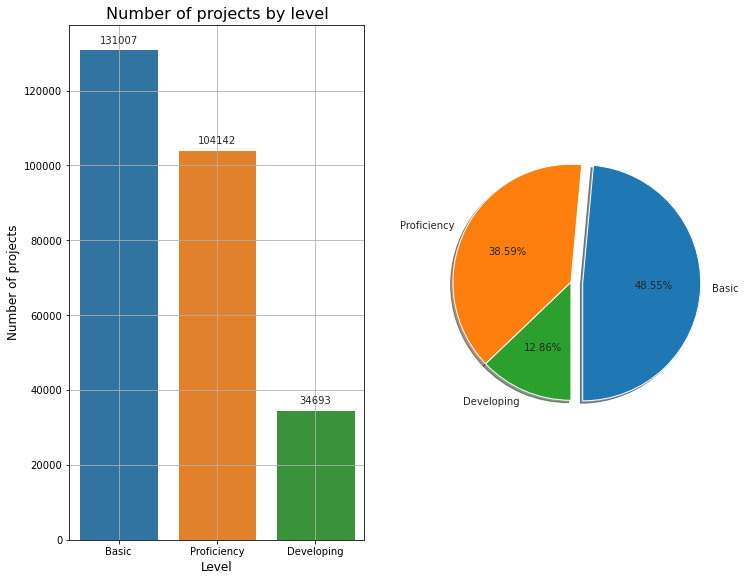

In [17]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(10, 8))
fig.tight_layout(pad=2)

plt.subplot(1,2,1)

sns.set_style('whitegrid')
ax1 = sns.barplot(x=names, y=values, data=df_dr_scratch)
for patch in ax1.patches:
    ax1.annotate(format(patch.get_height(), '.0f'),(patch.get_x() + patch.get_width() / 2., patch.get_height()),
                ha='center', va='center', xytext=(0, 9), textcoords='offset points')
plt.title("Number of projects by level", fontsize=16)
plt.xlabel('Level', fontsize=12)
plt.ylabel('Number of projects', fontsize=12)
ax1.grid(True)


plt.subplot(1,2,2)
explode = (0.1, 0, 0)
plt.pie(values, explode=explode, labels=names, autopct='%1.2f%%', shadow=True, startangle=270)
ax2.axis('equal')
ax2.grid(False)
plt.show()

Se muestra a continuación una forma de filtrar por nivel para luego poder visualizar la puntuación de los proyectos de cada nivel, en el conjunto total de proyectos de Dr. Scratch analizados. Con ello se conoce más en profundidad cada uno de los tres niveles en que se divide el conjunto total de proyectos.
- **Para nivel bajo o básico:**


In [18]:
filt_basic = df_dr_scratch['Level'].str.contains('Basic', na=False)
df_dr_scratch_basic = df_dr_scratch.loc[filt_basic].sort_values(by="Total")

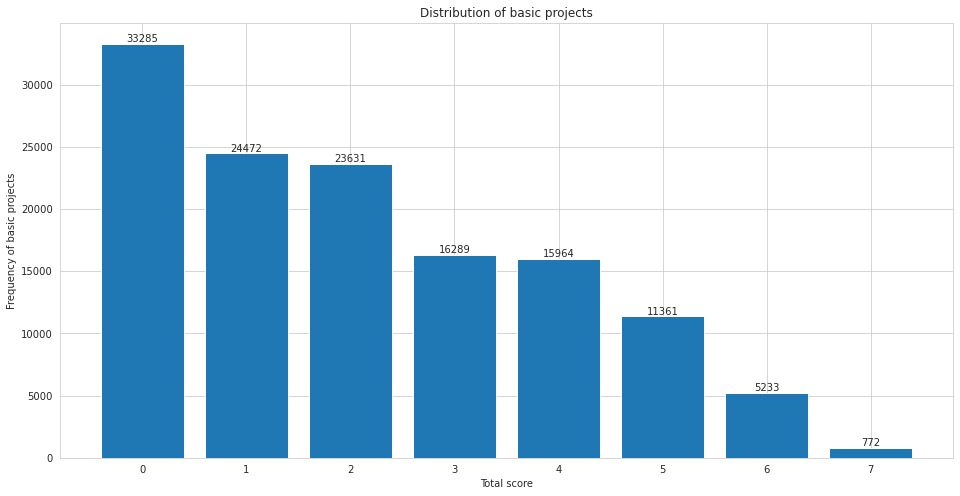

In [19]:
f, ax = plt.subplots(figsize=(16,8))
values = df_dr_scratch_basic["Total"].value_counts()
names = df_dr_scratch_basic.Total.unique()
plt.bar(names, values)
ax = plt.gca()
plt.bar_label(ax.containers[0])
plt.title("Distribution of basic projects")
plt.ylabel("Frequency of basic projects")
plt.xlabel("Total score")
plt.show()

Los proyectos de nivel básico más frecuentes son los de puntuación 0. Los que obtienen 1 y 2 puntos son los siguientes en cuanto a frecuencia o

- **Para nivel medio o desarrollador:**

In [20]:
filt_dev = df_dr_scratch['Level'].str.contains('Developing', na=False)
df_dr_scratch_dev = df_dr_scratch.loc[filt_dev].sort_values(by="Total")

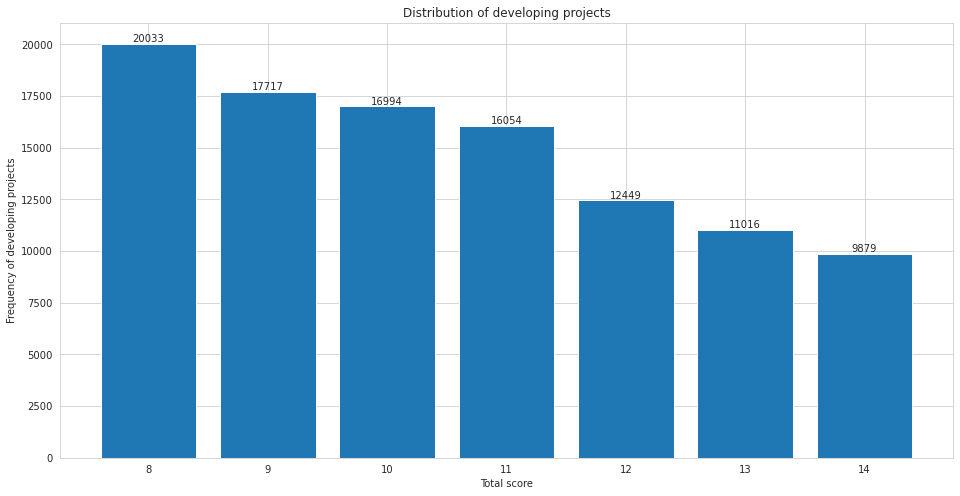

In [21]:
f, ax = plt.subplots(figsize=(16,8))
values = df_dr_scratch_dev["Total"].value_counts()
names = df_dr_scratch_dev.Total.unique()
plt.bar(names, values)
ax = plt.gca()
plt.bar_label(ax.containers[0])
plt.title("Distribution of developing projects")
plt.ylabel("Frequency of developing projects")
plt.xlabel("Total score")
plt.show()

Comentar

- **Para nivel alto o profesional:**

In [22]:
filt_dev = df_dr_scratch['Level'].str.contains('Proficiency', na=False)
df_dr_scratch_prof = df_dr_scratch.loc[filt_dev].sort_values(by="Total")

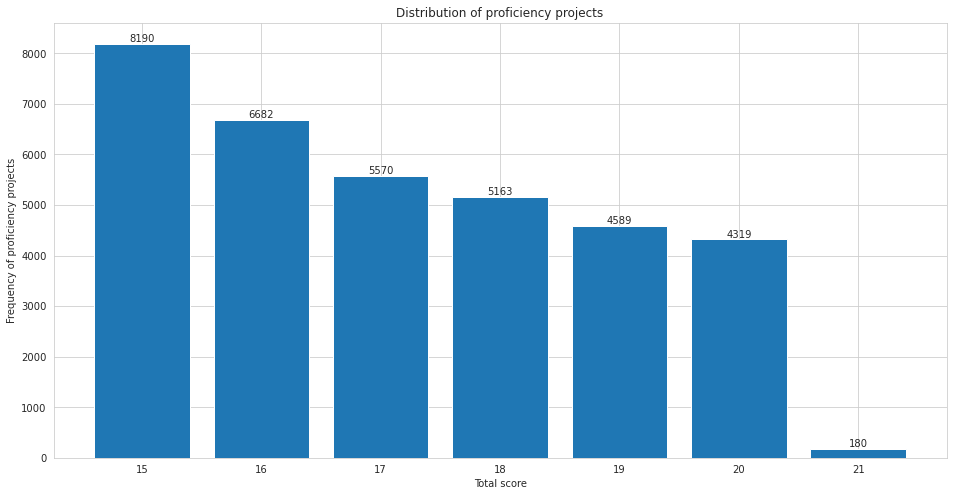

In [23]:
f, ax = plt.subplots(figsize=(16,8))
values = df_dr_scratch_prof["Total"].value_counts()
names = df_dr_scratch_prof.Total.unique()
plt.bar(names, values)
ax = plt.gca()
plt.bar_label(ax.containers[0])
plt.title("Distribution of proficiency projects")
plt.ylabel("Frequency of proficiency projects")
plt.xlabel("Total score")
plt.show()

Comentar

In [24]:
level_statistics = df_dr_scratch.groupby('Level')["Total"].agg([np.mean,np.median, np.var, np.std])
level_statistics

,mean,median,var,std
Level,,,,
Basic,4.634554,5.0,5.100514,2.258432
Developing,10.535164,10.0,3.755300,1.937860
Proficiency,17.198426,17.0,3.137785,1.771379


## Frecuencia de los proyectos por áreas del pensamiento computacional

In [25]:
df_dr_scratch.select_dtypes(include=np.number)

,Total,Average,Abstraction,Parallelization,Logic,Synchronization,Flow Control,UserInteractivity,DataRepresentation,Default sprite names,Default backdrop names,Duplicate scripts,Dead code
0,7.0,1.000000,0.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0
1,21.0,3.000000,3.0,3.0,3.0,3.0,3.0,3.0,3.0,0.0,0.0,1.0,1.0
2,9.0,1.285714,0.0,1.0,2.0,1.0,1.0,1.0,3.0,1.0,3.0,0.0,0.0
3,3.0,0.428571,0.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,6.0,0.857143,0.0,1.0,0.0,1.0,1.0,2.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
269839,13.0,1.857143,1.0,2.0,2.0,1.0,2.0,2.0,3.0,0.0,0.0,1.0,0.0
269840,13.0,1.857143,1.0,2.0,2.0,1.0,2.0,2.0,3.0,0.0,0.0,1.0,0.0
269841,13.0,1.857143,1.0,2.0,2.0,1.0,2.0,2.0,3.0,0.0,0.0,1.0,0.0
269842,16.0,2.285714,3.0,2.0,2.0,1.0,3.0,2.0,3.0,0.0,0.0,1.0,0.0


In [26]:
df_ct = df_dr_scratch.loc[:, "Abstraction":"DataRepresentation"]
df_ct

,Abstraction,Parallelization,Logic,Synchronization,Flow Control,UserInteractivity,DataRepresentation
0,0.0,2.0,1.0,1.0,1.0,1.0,1.0
1,3.0,3.0,3.0,3.0,3.0,3.0,3.0
2,0.0,1.0,2.0,1.0,1.0,1.0,3.0
3,0.0,2.0,0.0,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,1.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...
269839,1.0,2.0,2.0,1.0,2.0,2.0,3.0
269840,1.0,2.0,2.0,1.0,2.0,2.0,3.0
269841,1.0,2.0,2.0,1.0,2.0,2.0,3.0
269842,3.0,2.0,2.0,1.0,3.0,2.0,3.0


In [27]:
for column in df_ct: 
    print(df_dr_scratch.value_counts(column))

Abstraction
0.0    171517
1.0     40694
3.0     39438
2.0     18193
dtype: int64
Parallelization
2.0    149334
1.0     63683
3.0     39658
0.0     17167
dtype: int64
Logic
0.0    100164
1.0     67120
2.0     51965
3.0     50593
dtype: int64
Synchronization
1.0    156004
0.0     68035
3.0     28190
2.0     17613
dtype: int64
Flow Control
1.0    148270
2.0     68488
0.0     41389
3.0     11695
dtype: int64
UserInteractivity
2.0    141303
1.0    106593
0.0     19258
3.0      2688
dtype: int64
DataRepresentation
0.0    98578
1.0    90751
3.0    56258
2.0    24255
dtype: int64


Comentar

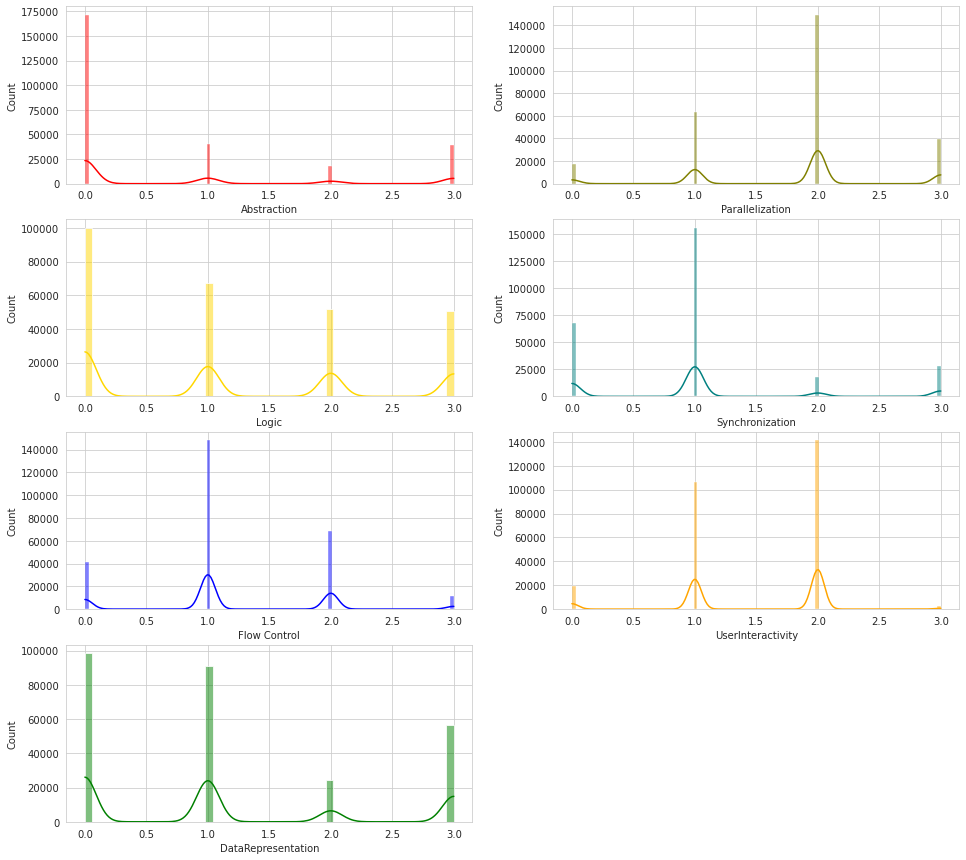

In [28]:
fig, axs = plt.subplots(4, 2, figsize=(16, 15))
sns.histplot(data=df_dr_scratch, x="Abstraction", kde=True, color="red", ax=axs[0, 0])
sns.histplot(data=df_dr_scratch, x="Parallelization", kde=True, color="olive", ax=axs[0, 1])
sns.histplot(data=df_dr_scratch, x="Logic", kde=True, color="gold", ax=axs[1, 0])
sns.histplot(data=df_dr_scratch, x="Synchronization", kde=True, color="teal", ax=axs[1, 1])
sns.histplot(data=df_dr_scratch, x="Flow Control", kde=True, color="blue", ax=axs[2, 0])
sns.histplot(data=df_dr_scratch, x="UserInteractivity", kde=True, color="orange", ax=axs[2, 1])
sns.histplot(data=df_dr_scratch, x="DataRepresentation", kde=True, color="green", ax=axs[3, 0])
#sns.histplot(data=df_analyzer, x="Average", kde=True, color="red", ax=axs[3, 1])
ax=axs[3,1].remove()

## Análisis estadístico por áreas del pensamiento computacional

In [56]:
df_dr_scratch.describe()

,Total,Average,Abstraction,Parallelization,Logic,Synchronization,Flow Control,UserInteractivity,DataRepresentation,Default sprite names,Default backdrop names,Duplicate scripts,Dead code
count,269842.000000,269842.000000,269842.000000,269842.000000,269842.000000,269842.000000,269842.000000,269842.000000,269842.000000,269842.000000,269842.000000,269842.000000,269842.000000
mean,8.527127,1.218161,0.724105,1.783729,1.196363,1.022080,1.187106,1.472206,1.141538,1.035847,1.038938,0.418171,0.550144
std,4.786304,0.683758,1.100698,0.768552,1.129239,0.857199,0.738610,0.641784,1.126550,4.806418,3.232489,2.033208,2.493117
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,0.714286,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,8.000000,1.142857,0.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,0.000000,1.000000,0.000000,0.000000
75%,12.000000,1.714286,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000
max,21.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,381.000000,368.000000,96.000000,149.000000


In [29]:
df_dr_scratch.mean()

Total                     8.527127
Average                   1.218161
Abstraction               0.724105
Parallelization           1.783729
Logic                     1.196363
Synchronization           1.022080
Flow Control              1.187106
UserInteractivity         1.472206
DataRepresentation        1.141538
Default sprite names      1.035847
Default backdrop names    1.038938
Duplicate scripts         0.418171
Dead code                 0.550144
dtype: float64

In [30]:
df_dr_scratch.median()

Total                     8.000000
Average                   1.142857
Abstraction               0.000000
Parallelization           2.000000
Logic                     1.000000
Synchronization           1.000000
Flow Control              1.000000
UserInteractivity         2.000000
DataRepresentation        1.000000
Default sprite names      0.000000
Default backdrop names    1.000000
Duplicate scripts         0.000000
Dead code                 0.000000
dtype: float64

In [31]:
df_dr_scratch.quantile(0.9)

Total                     15.000000
Average                    2.142857
Abstraction                3.000000
Parallelization            3.000000
Logic                      3.000000
Synchronization            3.000000
Flow Control               2.000000
UserInteractivity          2.000000
DataRepresentation         3.000000
Default sprite names       2.000000
Default backdrop names     1.000000
Duplicate scripts          1.000000
Dead code                  1.000000
Name: 0.9, dtype: float64

Diagrama de cajas (explicar)

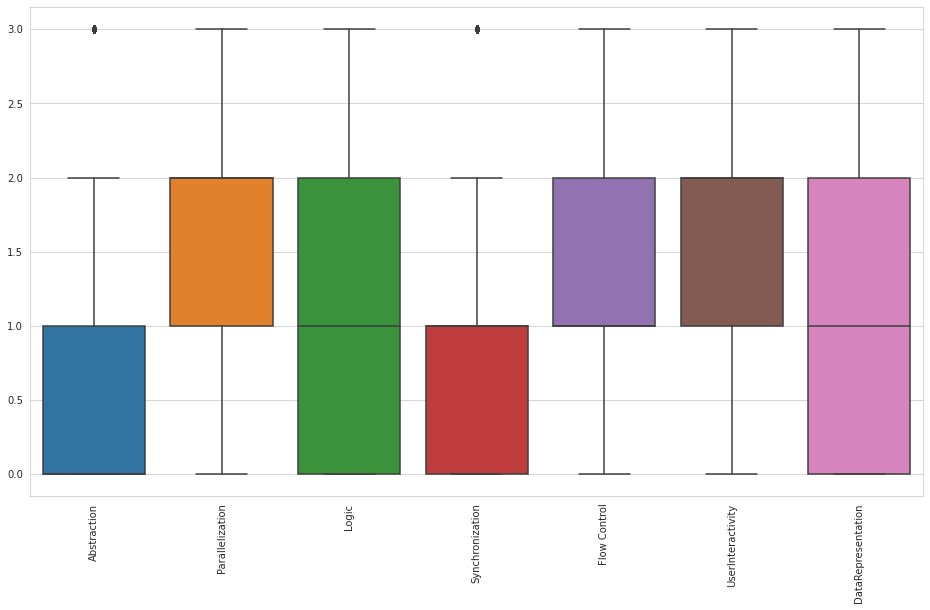

In [32]:
sns.boxplot(data=df_ct)
plt.xticks(rotation=90);

In [33]:
df_dr_scratch.var()

Total                     22.908705
Average                    0.467525
Abstraction                1.211536
Parallelization            0.590672
Logic                      1.275182
Synchronization            0.734790
Flow Control               0.545544
UserInteractivity          0.411887
DataRepresentation         1.269115
Default sprite names      23.101650
Default backdrop names    10.448982
Duplicate scripts          4.133937
Dead code                  6.215631
dtype: float64

In [34]:
df_dr_scratch.std()

Total                     4.786304
Average                   0.683758
Abstraction               1.100698
Parallelization           0.768552
Logic                     1.129239
Synchronization           0.857199
Flow Control              0.738610
UserInteractivity         0.641784
DataRepresentation        1.126550
Default sprite names      4.806418
Default backdrop names    3.232489
Duplicate scripts         2.033208
Dead code                 2.493117
dtype: float64

In [35]:
agg = df_dr_scratch.loc[:, "Level":"DataRepresentation"].groupby('Level').agg([np.mean, np.std])
agg


Abstraction           Parallelization               Logic  \
                   mean       std            mean       std      mean   
Level                                                                   
Basic          0.074065  0.329951        1.372423  0.720636  0.411634   
Developing     0.872405  0.997488        2.007701  0.525329  1.689693   
Proficiency    2.733606  0.570722        2.664572  0.489414  2.678754   

                      Synchronization           Flow Control            \
                  std            mean       std         mean       std   
Level                                                                    
Basic        0.576372        0.526422  0.546317     0.740418  0.543354   
Developing   1.017086        1.242525  0.652300     1.413455  0.547926   
Proficiency  0.552468        2.232035  0.879388     2.194420  0.552492   

            UserInteractivity           DataRepresentation            
                         mean       std               mean       std  
Level                                                                 
Basic                1.146221  0.653542           0.363370  0.539624  
Developing           1.715485  0.474423           1.593901  0.990701  
Proficiency          1.972905  0.292422           2.722134  0.652788

In [36]:
cv = df_dr_scratch.std()/df_dr_scratch.mean()
cv

Total                     0.561303
Average                   0.561303
Abstraction               1.520080
Parallelization           0.430868
Logic                     0.943894
Synchronization           0.838681
Flow Control              0.622194
UserInteractivity         0.435934
DataRepresentation        0.986870
Default sprite names      4.640085
Default backdrop names    3.111340
Duplicate scripts         4.862150
Dead code                 4.531752
dtype: float64

<AxesSubplot:>

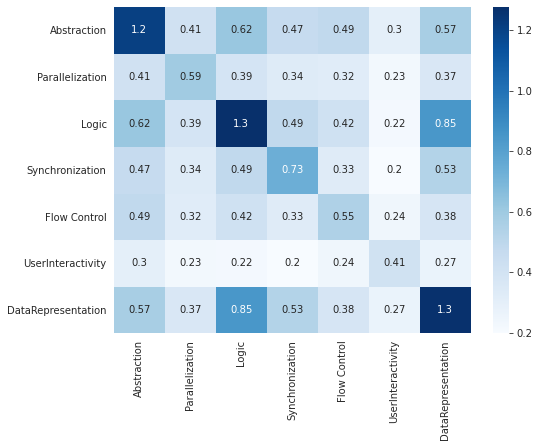

In [37]:
plt.figure(figsize=(8,6))
cov_matrix= df_ct.cov()
sns.heatmap(cov_matrix, annot= True, cmap='Blues')

In [38]:
# Correlación de cada CT con la puntuación total.ojo
df_dr_scratch.corrwith(df_dr_scratch["Total"])

Total                     1.000000
Average                   1.000000
Abstraction               0.772359
Parallelization           0.720550
Logic                     0.787795
Synchronization           0.753190
Flow Control              0.772396
UserInteractivity         0.609517
DataRepresentation        0.786001
Default sprite names      0.133951
Default backdrop names    0.041056
Duplicate scripts         0.328655
Dead code                 0.322603
dtype: float64

<AxesSubplot:>

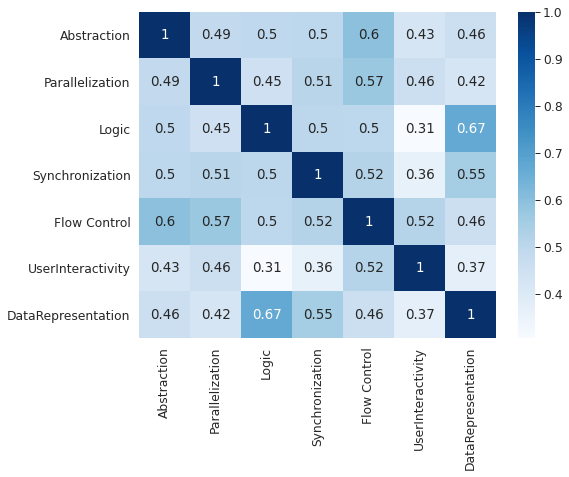

In [39]:
plt.figure(figsize=(8,6))
sns.set_context('paper', font_scale=1.4)
corr_matrix= df_ct.corr()
sns.heatmap(corr_matrix, annot= True, cmap='Blues')

Text(0, 0.5, 'Flow Control')

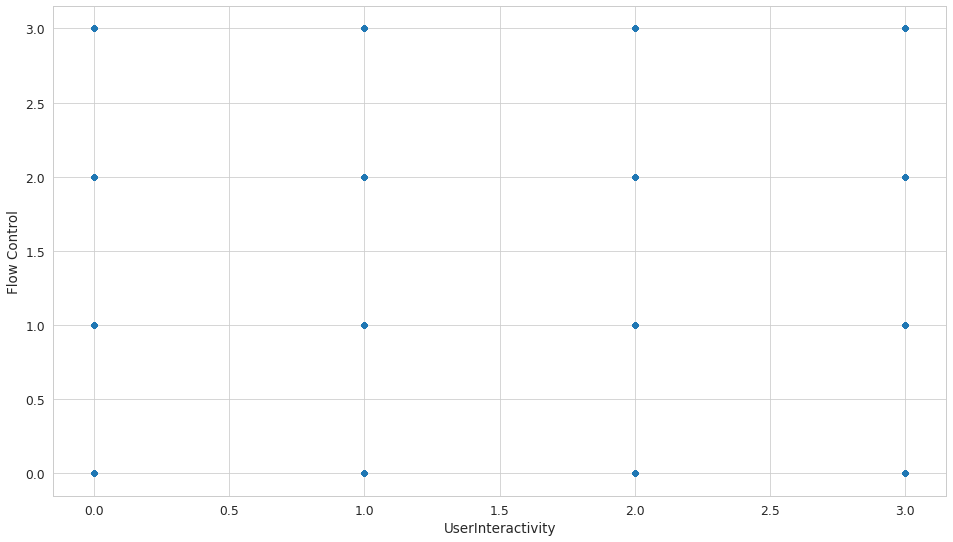

In [40]:
plt.scatter(df_dr_scratch['UserInteractivity'], df_dr_scratch['Flow Control'])
plt.xlabel('UserInteractivity')
plt.ylabel('Flow Control')

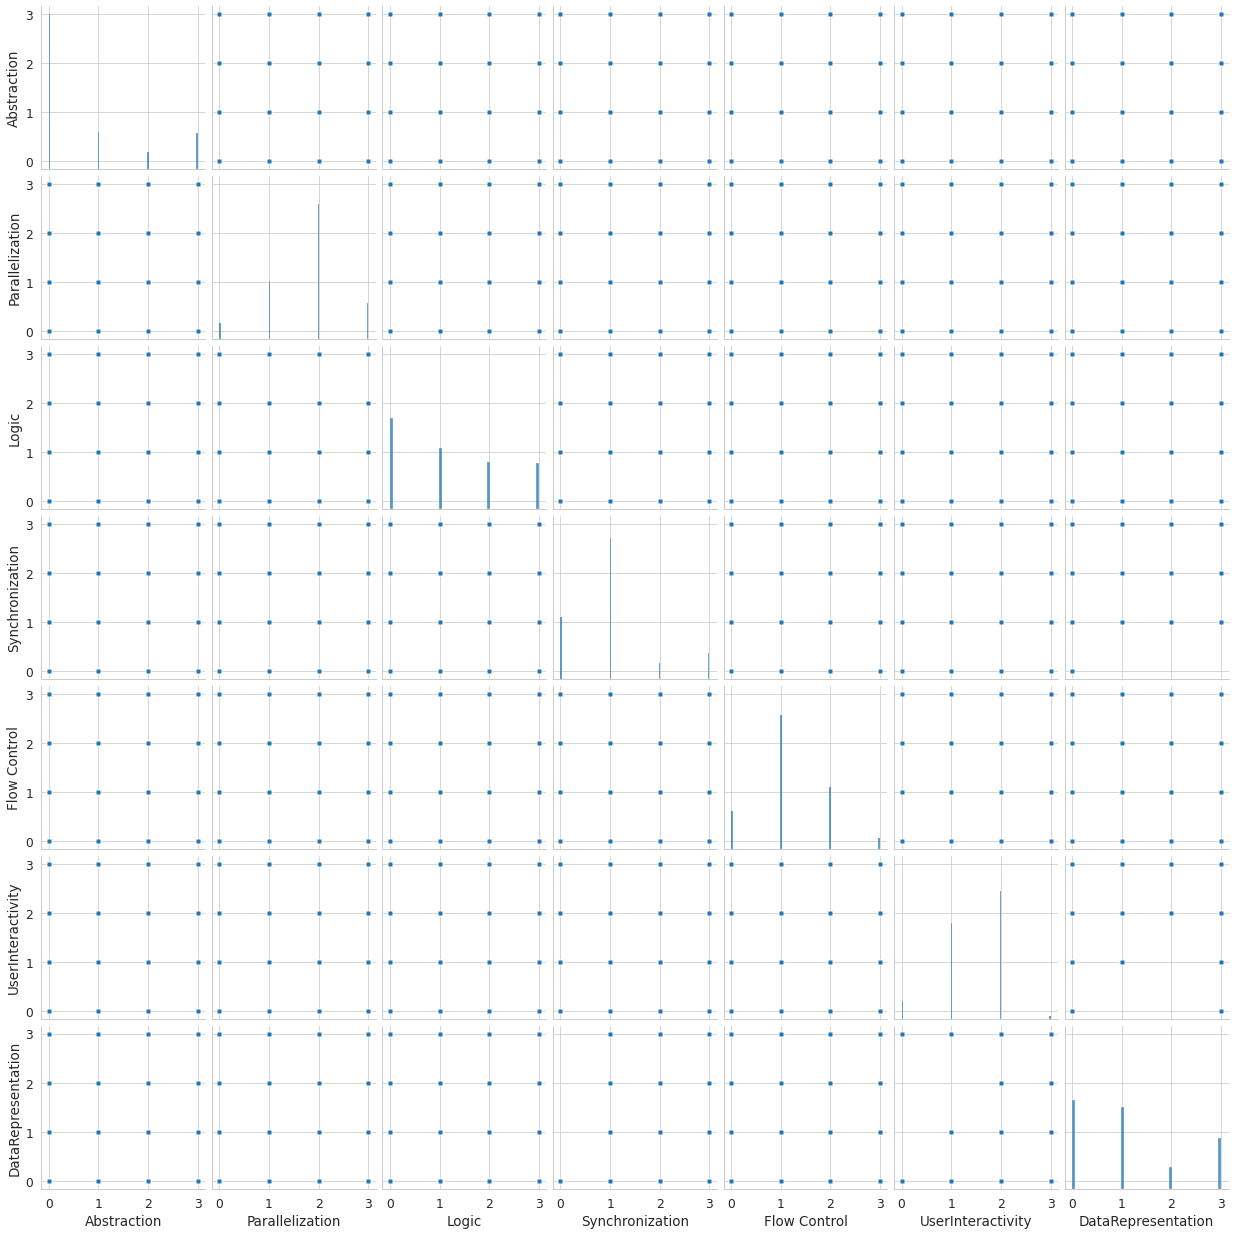

In [41]:
sns.pairplot(df_ct)

### Distribución de las 7 dimensiones CT por puntuación total

In [42]:
total_score = df_dr_scratch["Total"].sort_values().unique().tolist()
ct = df_ct.columns.values.tolist()
df_total_group = df_dr_scratch.groupby("Total")

--> Score: 0.0


,Abstraction,Parallelization,Logic,Synchronization,Flow Control,UserInteractivity,DataRepresentation
17,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30,0.0,0.0,0.0,0.0,0.0,0.0,0.0
36,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
269559,0.0,0.0,0.0,0.0,0.0,0.0,0.0
269606,0.0,0.0,0.0,0.0,0.0,0.0,0.0
269623,0.0,0.0,0.0,0.0,0.0,0.0,0.0
269746,0.0,0.0,0.0,0.0,0.0,0.0,0.0


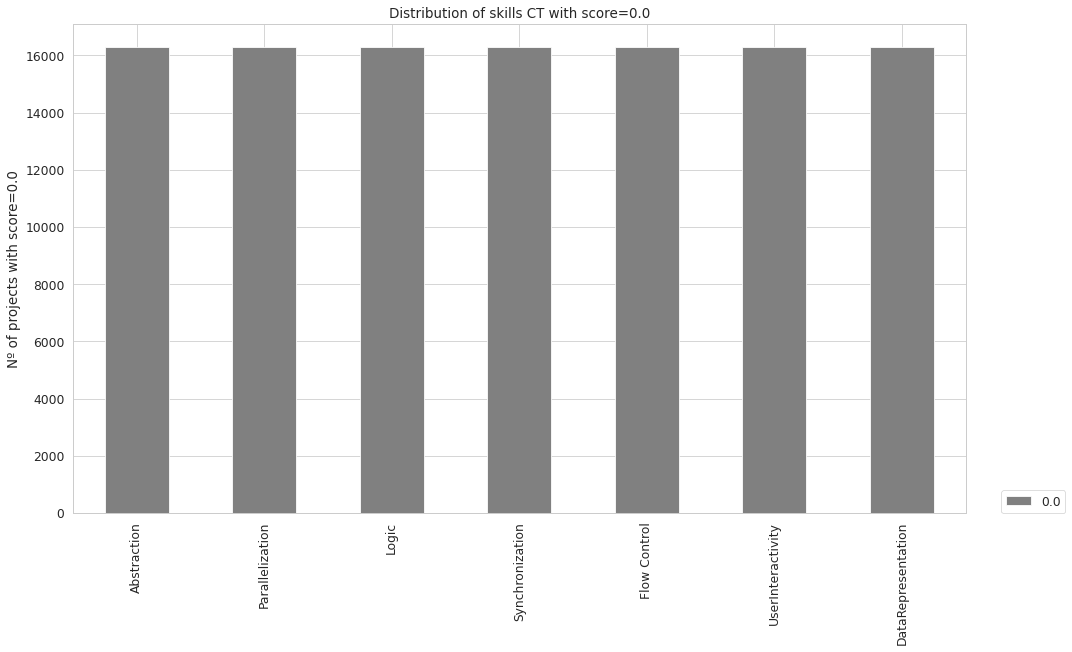

--> Score: 1.0


,Abstraction,Parallelization,Logic,Synchronization,Flow Control,UserInteractivity,DataRepresentation
379,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2144,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3182,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3689,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3690,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...
266415,0.0,0.0,0.0,0.0,0.0,1.0,0.0
266794,0.0,0.0,0.0,0.0,0.0,1.0,0.0
267337,0.0,0.0,0.0,0.0,1.0,0.0,0.0
267338,0.0,0.0,0.0,0.0,1.0,0.0,0.0


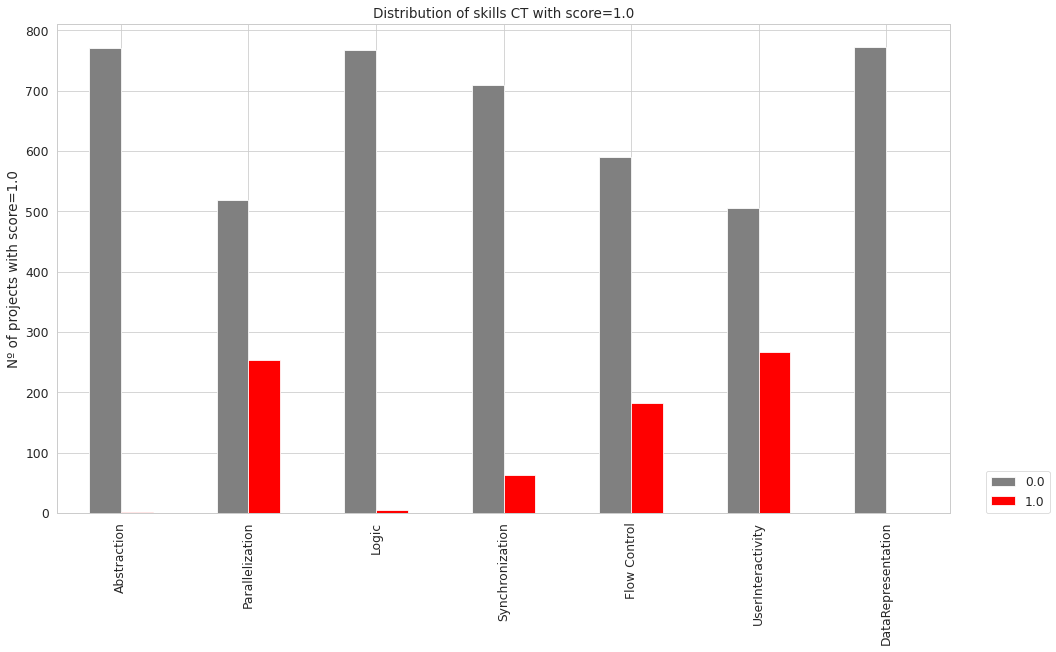

Matriz de covarianza entre las 7 dimensiones para la puntuación 1.0


,Abstraction,Parallelization,Logic,Synchronization,Flow Control,UserInteractivity,DataRepresentation
Abstraction,294912.0,101376.0,292608.0,248064.0,156672.0,92160.0,296448.0
Parallelization,101376.0,34848.0,100584.0,85272.0,53856.0,31680.0,101904.0
Logic,292608.0,100584.0,290322.0,246126.0,155448.0,91440.0,294132.0
Synchronization,248064.0,85272.0,246126.0,208658.0,131784.0,77520.0,249356.0
Flow Control,156672.0,53856.0,155448.0,131784.0,83232.0,48960.0,157488.0
UserInteractivity,92160.0,31680.0,91440.0,77520.0,48960.0,28800.0,92640.0
DataRepresentation,296448.0,101904.0,294132.0,249356.0,157488.0,92640.0,297992.0


Matriz de correlación entre las 7 dimensiones para la puntuación 1.0


,Abstraction,Parallelization,Logic,Synchronization,Flow Control,UserInteractivity,DataRepresentation
Abstraction,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Parallelization,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Logic,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Synchronization,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Flow Control,1.0,1.0,1.0,1.0,1.0,1.0,1.0
UserInteractivity,1.0,1.0,1.0,1.0,1.0,1.0,1.0
DataRepresentation,1.0,1.0,1.0,1.0,1.0,1.0,1.0


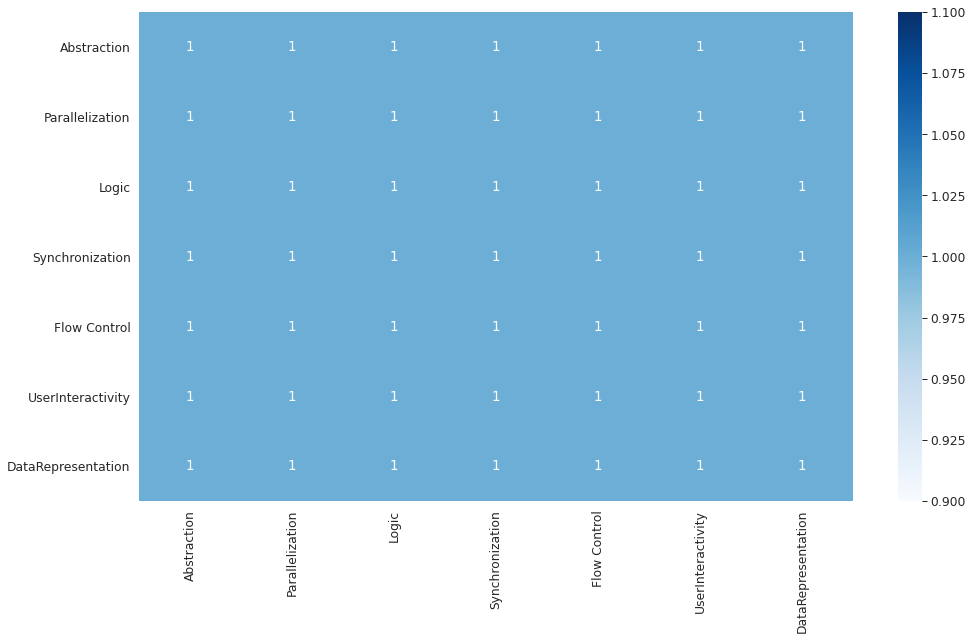

--> Score: 2.0


,Abstraction,Parallelization,Logic,Synchronization,Flow Control,UserInteractivity,DataRepresentation
147,0.0,1.0,0.0,0.0,0.0,1.0,0.0
549,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3054,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3055,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3181,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...
266375,0.0,0.0,0.0,0.0,0.0,2.0,0.0
266692,0.0,1.0,0.0,0.0,0.0,1.0,0.0
266735,0.0,1.0,0.0,0.0,0.0,1.0,0.0
268559,0.0,0.0,0.0,0.0,0.0,2.0,0.0


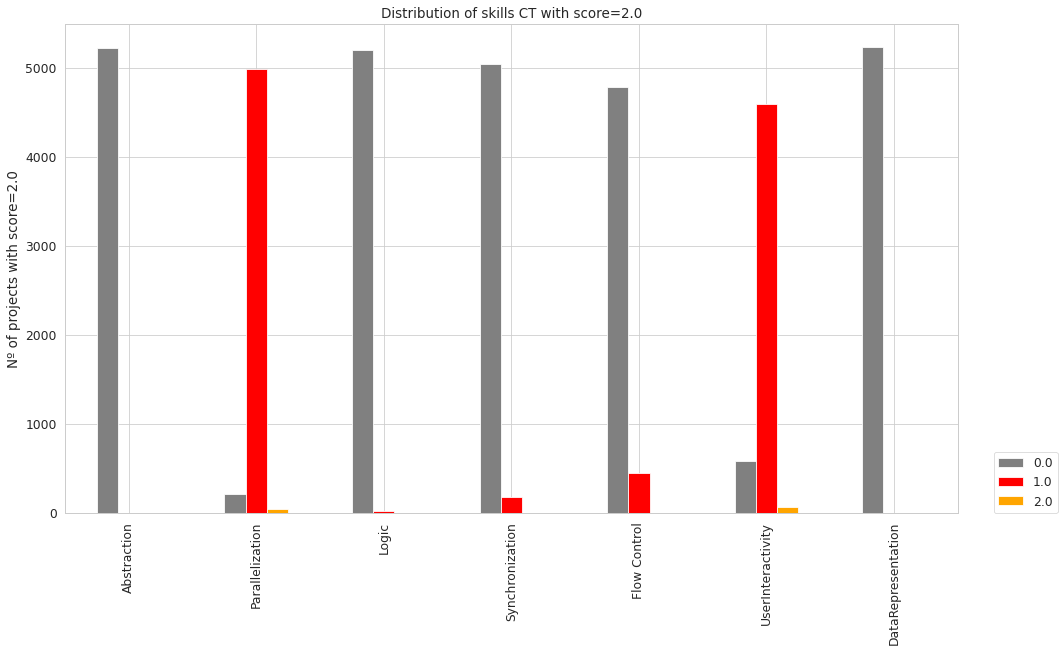

Matriz de covarianza entre las 7 dimensiones para la puntuación 2.0


,Abstraction,Parallelization,Logic,Synchronization,Flow Control,UserInteractivity,DataRepresentation
Abstraction,9.096729e+06,-4.007958e+06,9.036668e+06,8.621519e+06,7.945274e+06,-3.039323e+06,9.112397e+06
Parallelization,-4.007958e+06,7.883496e+06,-3.962912e+06,-3.583141e+06,-2.959574e+06,6.940495e+06,-4.019816e+06
Logic,9.036668e+06,-3.962912e+06,8.977060e+06,8.565250e+06,7.894459e+06,-3.002241e+06,9.052218e+06
Synchronization,8.621519e+06,-3.583141e+06,8.565250e+06,8.178721e+06,7.549270e+06,-2.683287e+06,8.636194e+06
Flow Control,7.945274e+06,-2.959574e+06,7.894459e+06,7.549270e+06,6.987422e+06,-2.159205e+06,7.958521e+06
UserInteractivity,-3.039323e+06,6.940495e+06,-3.002241e+06,-2.683287e+06,-2.159205e+06,6.144197e+06,-3.049095e+06
DataRepresentation,9.112397e+06,-4.019816e+06,9.052218e+06,8.636194e+06,7.958521e+06,-3.049095e+06,9.128096e+06


Matriz de correlación entre las 7 dimensiones para la puntuación 2.0


,Abstraction,Parallelization,Logic,Synchronization,Flow Control,UserInteractivity,DataRepresentation
Abstraction,1.000000,-0.473283,0.999997,0.999536,0.996570,-0.406538,1.000000
Parallelization,-0.473283,1.000000,-0.471073,-0.446233,-0.398760,0.997237,-0.473867
Logic,0.999997,-0.471073,1.000000,0.999609,0.996774,-0.404246,0.999995
Synchronization,0.999536,-0.446233,0.999609,1.000000,0.998628,-0.378523,0.999516
Flow Control,0.996570,-0.398760,0.996774,0.998628,1.000000,-0.329536,0.996515
UserInteractivity,-0.406538,0.997237,-0.404246,-0.378523,-0.329536,1.000000,-0.407144
DataRepresentation,1.000000,-0.473867,0.999995,0.999516,0.996515,-0.407144,1.000000


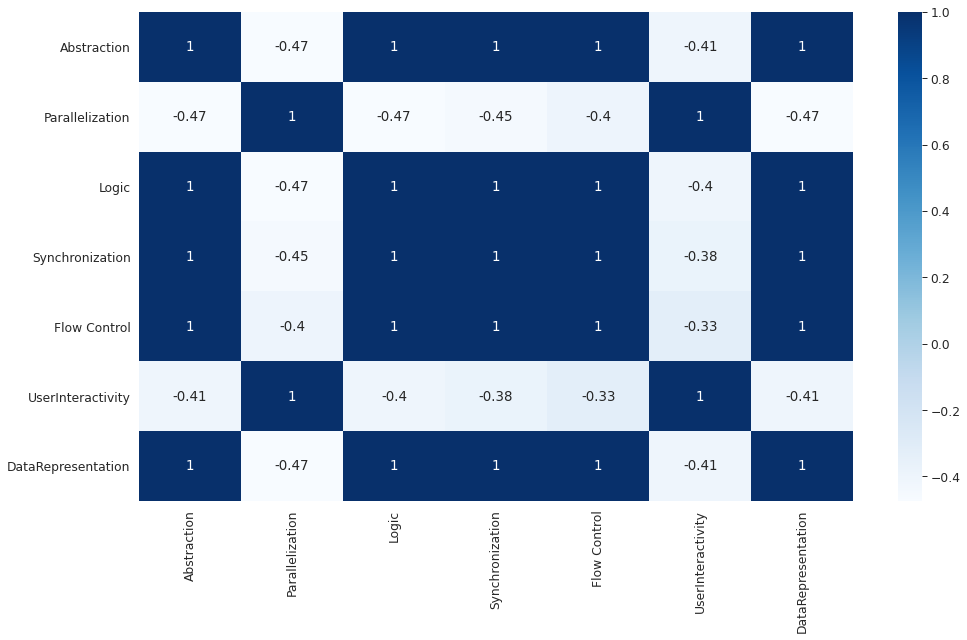

--> Score: 3.0


,Abstraction,Parallelization,Logic,Synchronization,Flow Control,UserInteractivity,DataRepresentation
3,0.0,2.0,0.0,0.0,1.0,0.0,0.0
74,0.0,1.0,0.0,0.0,1.0,1.0,0.0
342,0.0,1.0,0.0,0.0,1.0,1.0,0.0
344,0.0,2.0,0.0,0.0,0.0,1.0,0.0
349,0.0,1.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...
269458,0.0,1.0,0.0,0.0,1.0,1.0,0.0
269459,0.0,1.0,0.0,0.0,1.0,1.0,0.0
269517,0.0,1.0,0.0,1.0,1.0,0.0,0.0
269518,0.0,1.0,0.0,1.0,1.0,0.0,0.0


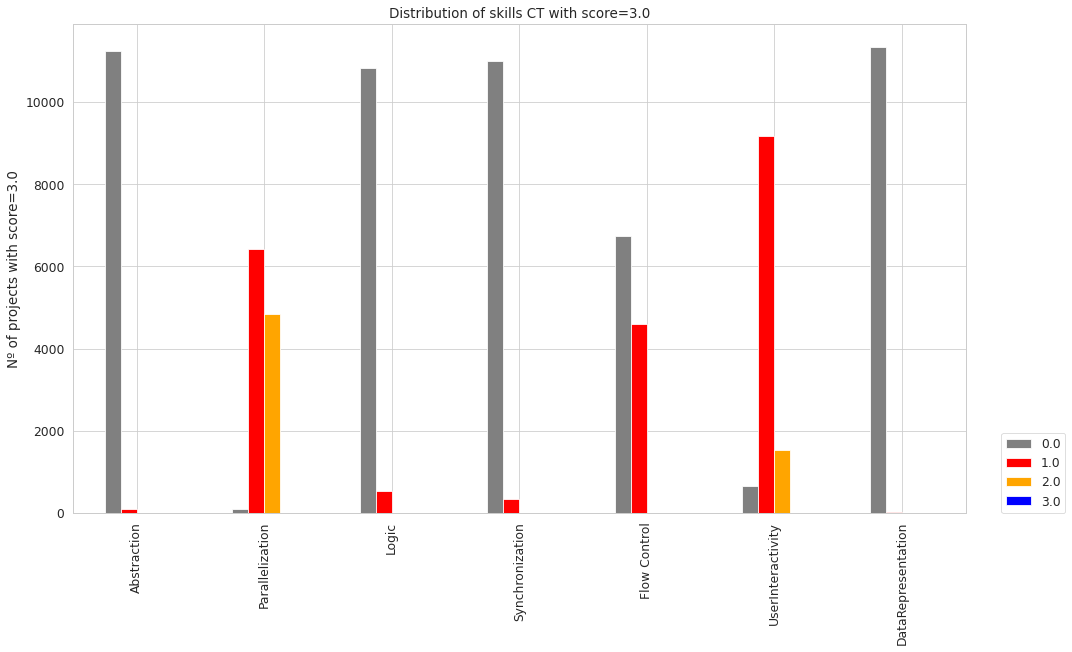

Matriz de covarianza entre las 7 dimensiones para la puntuación 3.0


,Abstraction,Parallelization,Logic,Synchronization,Flow Control,UserInteractivity,DataRepresentation
Abstraction,31435364.25,-1.016364e+07,2.985670e+07,30521189.25,1.466598e+07,-7.975276e+06,3.176230e+07
Parallelization,-10163640.75,1.080283e+07,-9.281341e+06,-9662187.75,-6.631578e+05,1.137702e+07,-1.034773e+07
Logic,29856697.25,-9.281341e+06,2.839678e+07,29009646.25,1.435490e+07,-6.786135e+06,3.015930e+07
Synchronization,30521189.25,-9.662188e+06,2.900965e+07,29645012.25,1.446827e+07,-7.317385e+06,3.083436e+07
Flow Control,14665979.25,-6.631578e+05,1.435490e+07,14468273.25,1.142973e+07,4.804306e+06,1.473308e+07
UserInteractivity,-7975275.75,1.137702e+07,-6.786135e+06,-7317384.75,4.804306e+06,1.824807e+07,-8.217742e+06
DataRepresentation,31762301.25,-1.034773e+07,3.015930e+07,30834356.25,1.473308e+07,-8.217742e+06,3.209423e+07


Matriz de correlación entre las 7 dimensiones para la puntuación 3.0


,Abstraction,Parallelization,Logic,Synchronization,Flow Control,UserInteractivity,DataRepresentation
Abstraction,1.000000,-0.551533,0.999305,0.999807,0.773720,-0.332988,0.999975
Parallelization,-0.551533,1.000000,-0.529917,-0.539922,-0.059680,0.810310,-0.555729
Logic,0.999305,-0.529917,1.000000,0.999844,0.796797,-0.298112,0.999018
Synchronization,0.999807,-0.539922,0.999844,1.000000,0.786000,-0.314609,0.999645
Flow Control,0.773720,-0.059680,0.796797,0.786000,1.000000,0.332663,0.769240
UserInteractivity,-0.332988,0.810310,-0.298112,-0.314609,0.332663,1.000000,-0.339571
DataRepresentation,0.999975,-0.555729,0.999018,0.999645,0.769240,-0.339571,1.000000


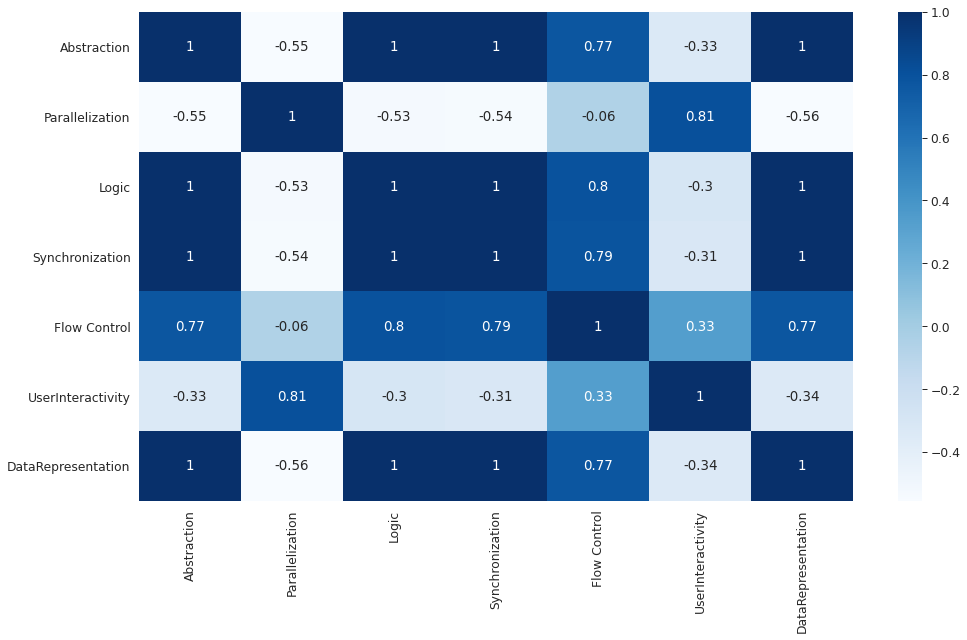

--> Score: 4.0


,Abstraction,Parallelization,Logic,Synchronization,Flow Control,UserInteractivity,DataRepresentation
7,0.0,2.0,0.0,0.0,1.0,1.0,0.0
21,0.0,2.0,0.0,0.0,1.0,1.0,0.0
22,0.0,2.0,0.0,0.0,1.0,1.0,0.0
25,0.0,2.0,0.0,0.0,1.0,1.0,0.0
26,0.0,2.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...
269407,0.0,2.0,0.0,0.0,1.0,1.0,0.0
269435,0.0,2.0,0.0,0.0,1.0,1.0,0.0
269447,0.0,2.0,0.0,0.0,1.0,1.0,0.0
269558,1.0,1.0,0.0,0.0,1.0,1.0,0.0


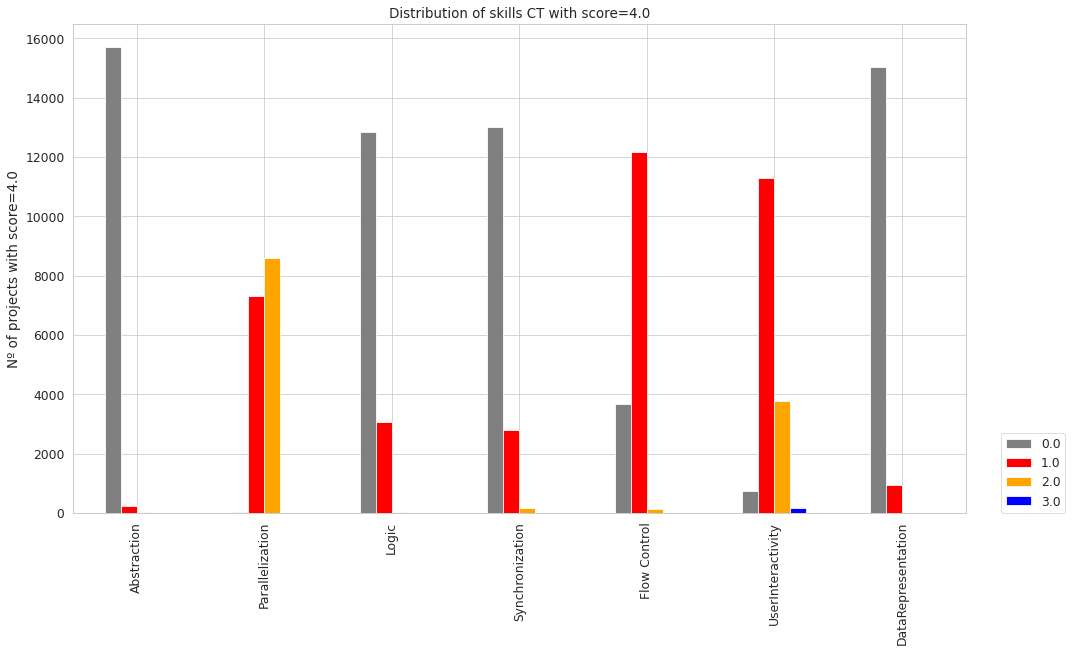

Matriz de covarianza entre las 7 dimensiones para la puntuación 4.0


,Abstraction,Parallelization,Logic,Synchronization,Flow Control,UserInteractivity,DataRepresentation
Abstraction,6.099770e+07,-2.049238e+07,4.624766e+07,4.710525e+07,-1.082914e+06,-1.642970e+07,5.746286e+07
Parallelization,-2.049238e+07,2.131512e+07,-1.351336e+07,-1.387197e+07,8.883502e+06,1.715570e+07,-1.883112e+07
Logic,4.624766e+07,-1.351336e+07,3.689038e+07,3.732417e+07,6.897095e+06,-6.469235e+06,4.402930e+07
Synchronization,4.710525e+07,-1.387197e+07,3.732417e+07,3.779803e+07,5.966636e+06,-7.340395e+06,4.478194e+07
Flow Control,-1.082914e+06,8.883502e+06,6.897095e+06,5.966636e+06,3.264230e+07,2.558583e+07,9.315107e+05
UserInteractivity,-1.642970e+07,1.715570e+07,-6.469235e+06,-7.340395e+06,2.558583e+07,2.611022e+07,-1.397920e+07
DataRepresentation,5.746286e+07,-1.883112e+07,4.402930e+07,4.478194e+07,9.315107e+05,-1.397920e+07,5.424972e+07


Matriz de correlación entre las 7 dimensiones para la puntuación 4.0


,Abstraction,Parallelization,Logic,Synchronization,Flow Control,UserInteractivity,DataRepresentation
Abstraction,1.000000,-0.568319,0.974937,0.981020,-0.024269,-0.411687,0.998922
Parallelization,-0.568319,1.000000,-0.481907,-0.488719,0.336783,0.727209,-0.553775
Logic,0.974937,-0.481907,1.000000,0.999537,0.198756,-0.208445,0.984207
Synchronization,0.981020,-0.488719,0.999537,1.000000,0.169865,-0.233657,0.988939
Flow Control,-0.024269,0.336783,0.198756,0.169865,1.000000,0.876403,0.022136
UserInteractivity,-0.411687,0.727209,-0.208445,-0.233657,0.876403,1.000000,-0.371431
DataRepresentation,0.998922,-0.553775,0.984207,0.988939,0.022136,-0.371431,1.000000


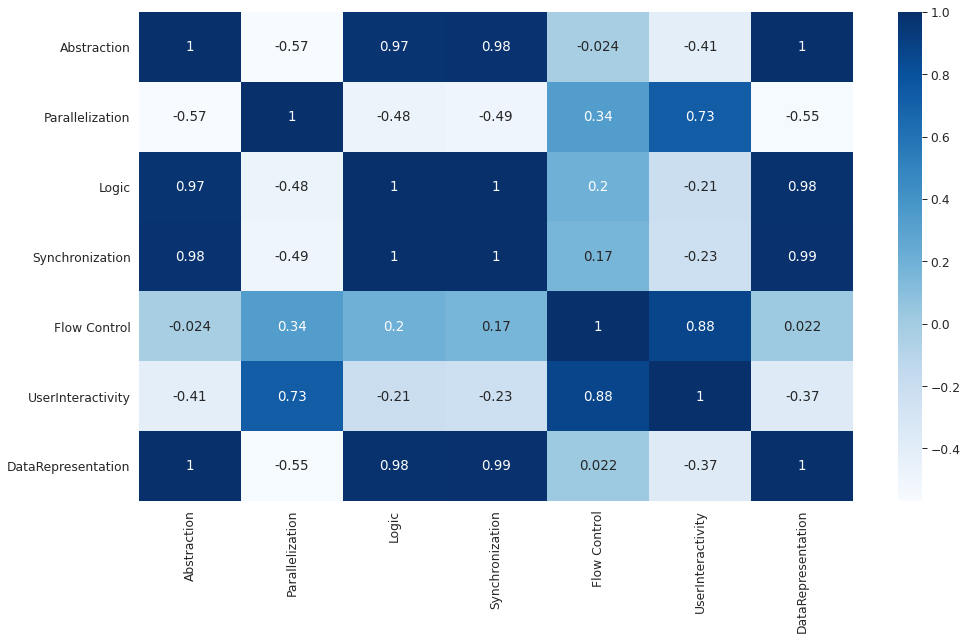

--> Score: 5.0


,Abstraction,Parallelization,Logic,Synchronization,Flow Control,UserInteractivity,DataRepresentation
27,0.0,1.0,0.0,0.0,2.0,2.0,0.0
28,0.0,1.0,0.0,0.0,2.0,2.0,0.0
110,1.0,2.0,0.0,0.0,1.0,1.0,0.0
128,0.0,2.0,1.0,0.0,1.0,1.0,0.0
354,1.0,2.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...
269470,0.0,1.0,0.0,1.0,1.0,1.0,1.0
269560,0.0,1.0,0.0,1.0,1.0,2.0,0.0
269562,0.0,1.0,0.0,1.0,1.0,2.0,0.0
269591,0.0,1.0,0.0,1.0,1.0,1.0,1.0


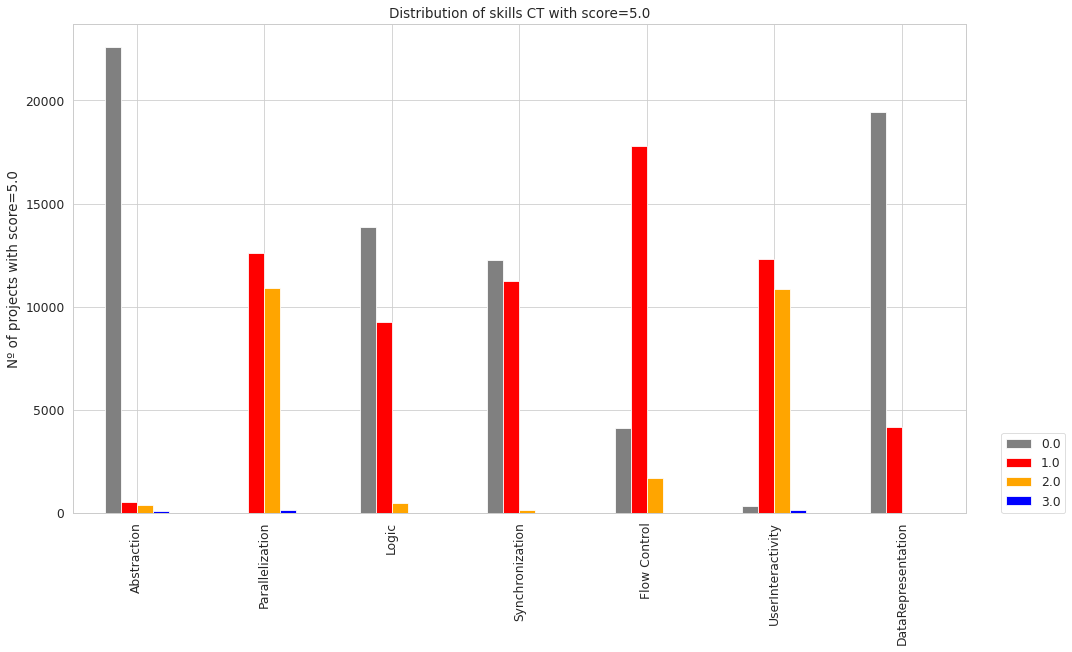

Matriz de covarianza entre las 7 dimensiones para la puntuación 5.0


,Abstraction,Parallelization,Logic,Synchronization,Flow Control,UserInteractivity,DataRepresentation
Abstraction,1.236319e+08,-4.266688e+07,5.966894e+07,4.787068e+07,-1.211175e+07,-4.044184e+07,1.007172e+08
Parallelization,-4.266688e+07,4.585911e+07,-5.878892e+06,1.112471e+06,3.434572e+07,4.457297e+07,-2.890153e+07
Logic,5.966894e+07,-5.878892e+06,4.616151e+07,4.478651e+07,2.752327e+07,-5.371528e+06,5.625907e+07
Synchronization,4.787068e+07,1.112471e+06,4.478651e+07,4.564125e+07,3.690490e+07,1.268089e+06,4.857526e+07
Flow Control,-1.211175e+07,3.434572e+07,2.752327e+07,3.690490e+07,6.550607e+07,3.303514e+07,4.770844e+06
UserInteractivity,-4.044184e+07,4.457297e+07,-5.371528e+06,1.268089e+06,3.303514e+07,4.334543e+07,-2.733720e+07
DataRepresentation,1.007172e+08,-2.890153e+07,5.625907e+07,4.857526e+07,4.770844e+06,-2.733720e+07,8.544060e+07


Matriz de correlación entre las 7 dimensiones para la puntuación 5.0


,Abstraction,Parallelization,Logic,Synchronization,Flow Control,UserInteractivity,DataRepresentation
Abstraction,1.000000,-0.566647,0.789847,0.637273,-0.134586,-0.552451,0.979955
Parallelization,-0.566647,1.000000,-0.127774,0.024316,0.626641,0.999740,-0.461717
Logic,0.789847,-0.127774,1.000000,0.975727,0.500517,-0.120084,0.895819
Synchronization,0.637273,0.024316,0.975727,1.000000,0.674939,0.028510,0.777865
Flow Control,-0.134586,0.626641,0.500517,0.674939,1.000000,0.619960,0.063771
UserInteractivity,-0.552451,0.999740,-0.120084,0.028510,0.619960,1.000000,-0.449211
DataRepresentation,0.979955,-0.461717,0.895819,0.777865,0.063771,-0.449211,1.000000


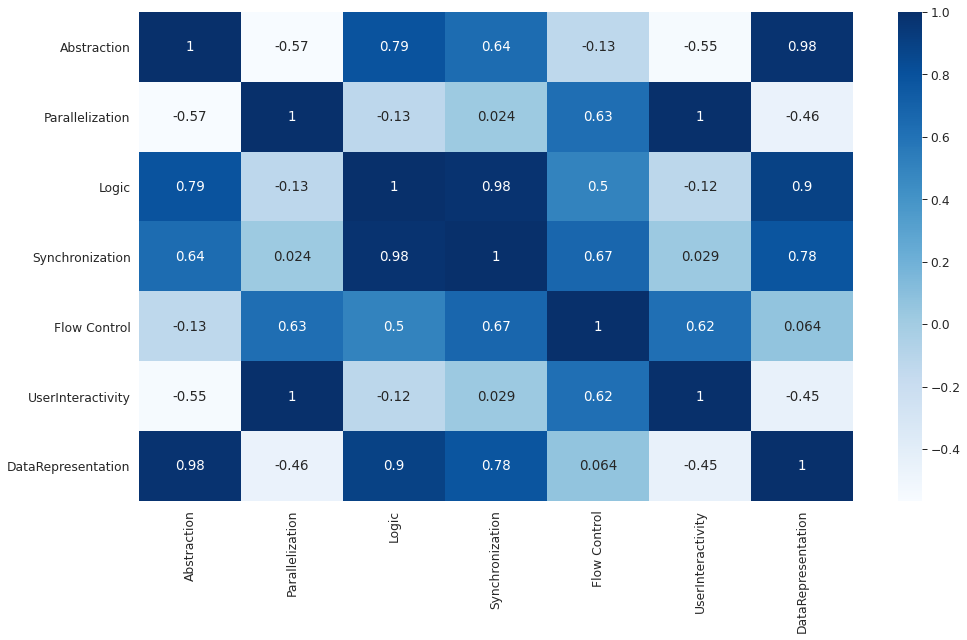

--> Score: 6.0


,Abstraction,Parallelization,Logic,Synchronization,Flow Control,UserInteractivity,DataRepresentation
4,0.0,1.0,0.0,1.0,1.0,2.0,1.0
123,0.0,2.0,1.0,1.0,1.0,1.0,0.0
124,0.0,2.0,1.0,1.0,1.0,1.0,0.0
152,0.0,1.0,1.0,1.0,1.0,1.0,1.0
153,0.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...
269633,0.0,2.0,0.0,1.0,1.0,1.0,1.0
269638,0.0,2.0,0.0,1.0,1.0,1.0,1.0
269736,0.0,1.0,0.0,3.0,1.0,1.0,0.0
269737,0.0,1.0,0.0,3.0,1.0,1.0,0.0


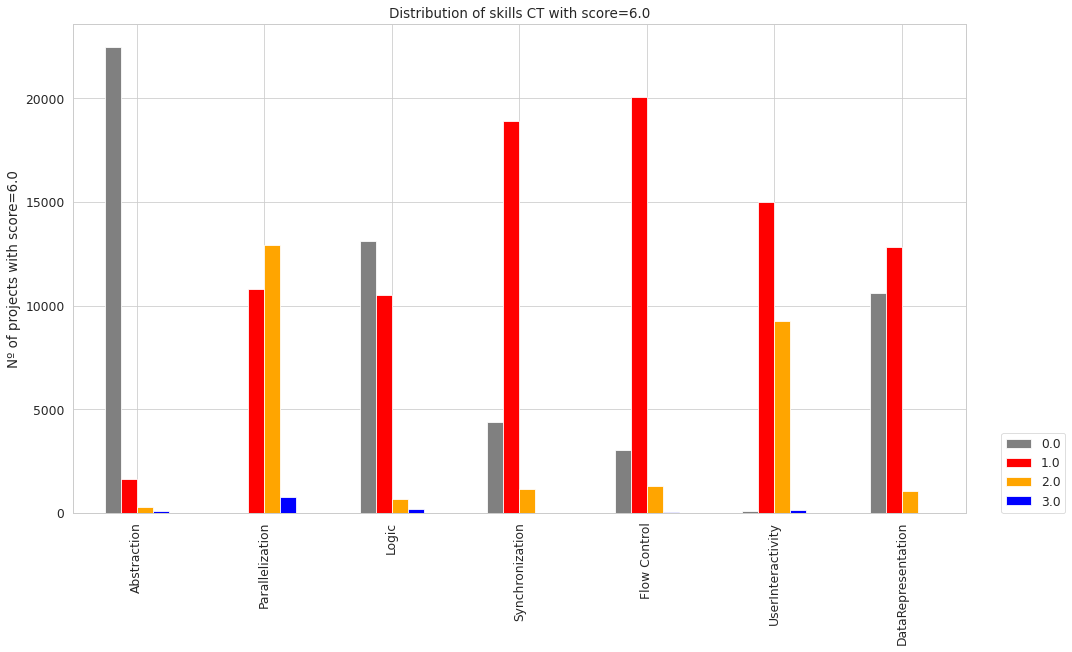

Matriz de covarianza entre las 7 dimensiones para la puntuación 6.0


,Abstraction,Parallelization,Logic,Synchronization,Flow Control,UserInteractivity,DataRepresentation
Abstraction,1.191943e+08,-4.266322e+07,5.403390e+07,-6478977.0,-1.586779e+07,-4.021551e+07,3.651943e+07
Parallelization,-4.266322e+07,4.473972e+07,-9.166742e+06,23016522.0,2.783636e+07,4.383315e+07,7.567667e+05
Logic,5.403390e+07,-9.166742e+06,4.420531e+07,35643555.0,3.387085e+07,4.951769e+06,4.137723e+07
Synchronization,-6.478977e+06,2.301652e+07,3.564356e+07,75894666.0,8.127190e+07,4.812857e+07,4.663401e+07
Flow Control,-1.586779e+07,2.783636e+07,3.387085e+07,81271900.0,8.770290e+07,5.434531e+07,4.689242e+07
UserInteractivity,-4.021551e+07,4.383315e+07,4.951769e+06,48128574.0,5.434531e+07,5.344139e+07,1.760635e+07
DataRepresentation,3.651943e+07,7.567667e+05,4.137723e+07,46634012.0,4.689242e+07,1.760635e+07,4.249104e+07


Matriz de correlación entre las 7 dimensiones para la puntuación 6.0


,Abstraction,Parallelization,Logic,Synchronization,Flow Control,UserInteractivity,DataRepresentation
Abstraction,1.000000,-0.584224,0.744392,-0.068120,-0.155196,-0.503880,0.513154
Parallelization,-0.584224,1.000000,-0.206125,0.394991,0.444385,0.896432,0.017357
Logic,0.744392,-0.206125,1.000000,0.615373,0.543979,0.101879,0.954719
Synchronization,-0.068120,0.394991,0.615373,1.000000,0.996157,0.755716,0.821199
Flow Control,-0.155196,0.444385,0.543979,0.996157,1.000000,0.793809,0.768152
UserInteractivity,-0.503880,0.896432,0.101879,0.755716,0.793809,1.000000,0.369472
DataRepresentation,0.513154,0.017357,0.954719,0.821199,0.768152,0.369472,1.000000


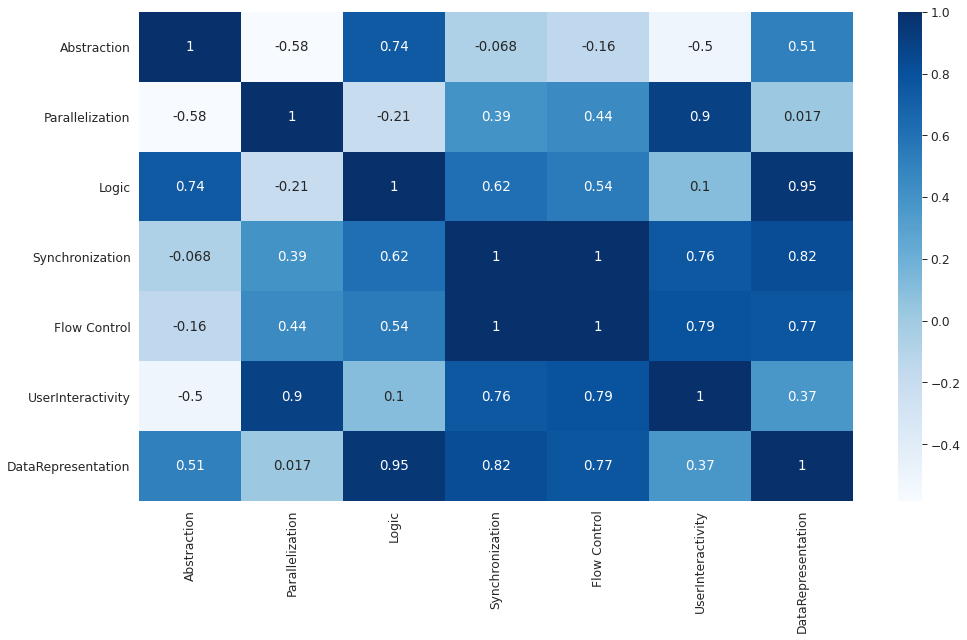

--> Score: 7.0


,Abstraction,Parallelization,Logic,Synchronization,Flow Control,UserInteractivity,DataRepresentation
0,0.0,2.0,1.0,1.0,1.0,1.0,1.0
32,1.0,2.0,0.0,1.0,1.0,1.0,1.0
33,1.0,2.0,0.0,1.0,1.0,1.0,1.0
41,1.0,1.0,0.0,1.0,1.0,2.0,1.0
42,1.0,1.0,0.0,1.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...
269738,0.0,1.0,0.0,3.0,1.0,1.0,1.0
269758,2.0,2.0,0.0,0.0,2.0,1.0,0.0
269759,2.0,2.0,0.0,0.0,2.0,1.0,0.0
269760,0.0,2.0,1.0,1.0,1.0,1.0,1.0


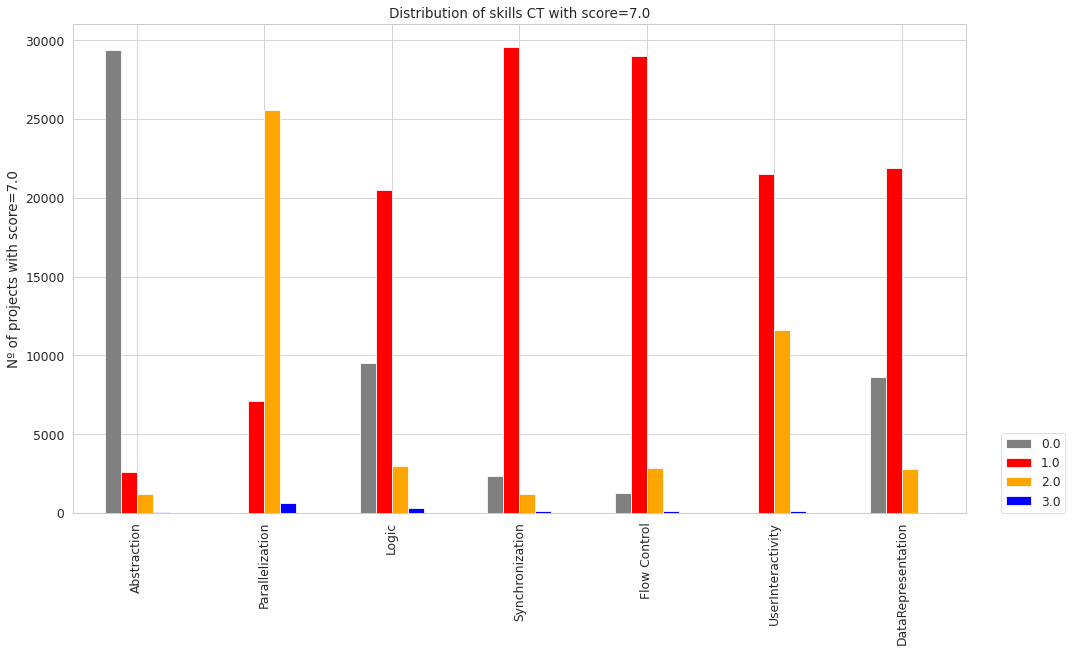

Matriz de covarianza entre las 7 dimensiones para la puntuación 7.0


,Abstraction,Parallelization,Logic,Synchronization,Flow Control,UserInteractivity,DataRepresentation
Abstraction,1.986623e+08,-7.589376e+07,1.994668e+07,-4.281759e+07,-5.316440e+07,-6.869822e+07,1.232267e+07
Parallelization,-7.589376e+07,1.422893e+08,-1.861251e+07,-1.214692e+07,5.117299e+05,5.751394e+07,-1.685052e+07
Logic,1.994668e+07,-1.861251e+07,8.038250e+07,1.180325e+08,1.122271e+08,6.588248e+07,8.689951e+07
Synchronization,-4.281759e+07,-1.214692e+07,1.180325e+08,2.013103e+08,1.952848e+08,1.241868e+08,1.310550e+08
Flow Control,-5.316440e+07,5.117299e+05,1.122271e+08,1.952848e+08,1.906662e+08,1.263218e+08,1.251945e+08
UserInteractivity,-6.869822e+07,5.751394e+07,6.588248e+07,1.241868e+08,1.263218e+08,1.067303e+08,7.523314e+07
DataRepresentation,1.232267e+07,-1.685052e+07,8.689951e+07,1.310550e+08,1.251945e+08,7.523314e+07,9.438588e+07


Matriz de correlación entre las 7 dimensiones para la puntuación 7.0


,Abstraction,Parallelization,Logic,Synchronization,Flow Control,UserInteractivity,DataRepresentation
Abstraction,1.000000,-0.451401,0.157845,-0.214107,-0.273166,-0.471785,0.089990
Parallelization,-0.451401,1.000000,-0.174036,-0.071771,0.003107,0.466706,-0.145403
Logic,0.157845,-0.174036,1.000000,0.927871,0.906526,0.711288,0.997661
Synchronization,-0.214107,-0.071771,0.927871,1.000000,0.996779,0.847224,0.950751
Flow Control,-0.273166,0.003107,0.906526,0.996779,1.000000,0.885518,0.933243
UserInteractivity,-0.471785,0.466706,0.711288,0.847224,0.885518,1.000000,0.749569
DataRepresentation,0.089990,-0.145403,0.997661,0.950751,0.933243,0.749569,1.000000


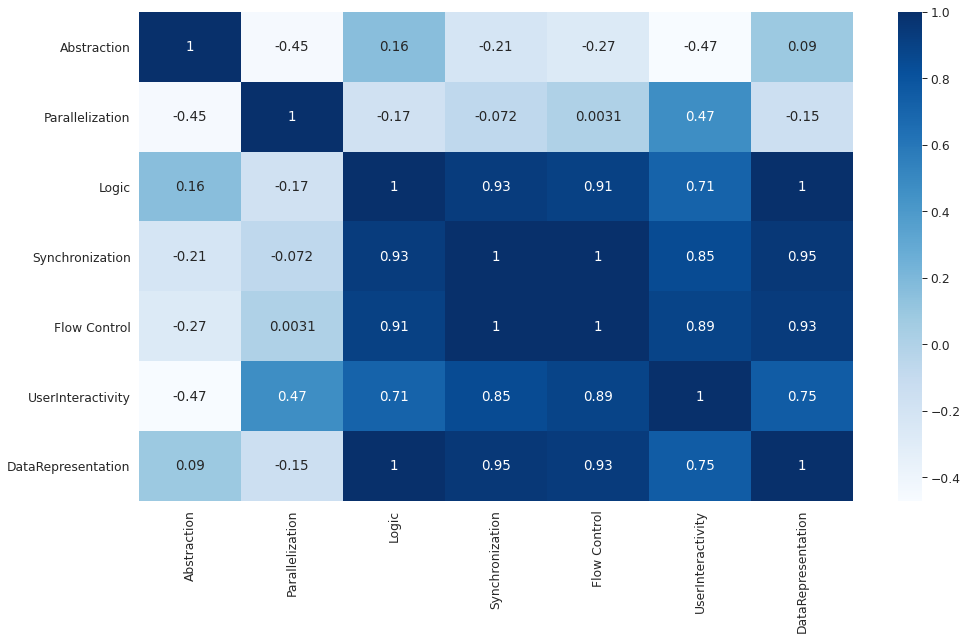

--> Score: 8.0


,Abstraction,Parallelization,Logic,Synchronization,Flow Control,UserInteractivity,DataRepresentation
52,0.0,1.0,1.0,1.0,1.0,2.0,2.0
58,0.0,2.0,1.0,1.0,2.0,2.0,0.0
160,1.0,2.0,0.0,2.0,2.0,1.0,0.0
171,3.0,2.0,0.0,0.0,2.0,1.0,0.0
186,3.0,2.0,0.0,0.0,2.0,1.0,0.0
...,...,...,...,...,...,...,...
269642,1.0,2.0,0.0,1.0,1.0,2.0,1.0
269643,1.0,2.0,0.0,1.0,1.0,2.0,1.0
269644,1.0,2.0,0.0,1.0,1.0,2.0,1.0
269668,0.0,1.0,1.0,1.0,1.0,2.0,2.0


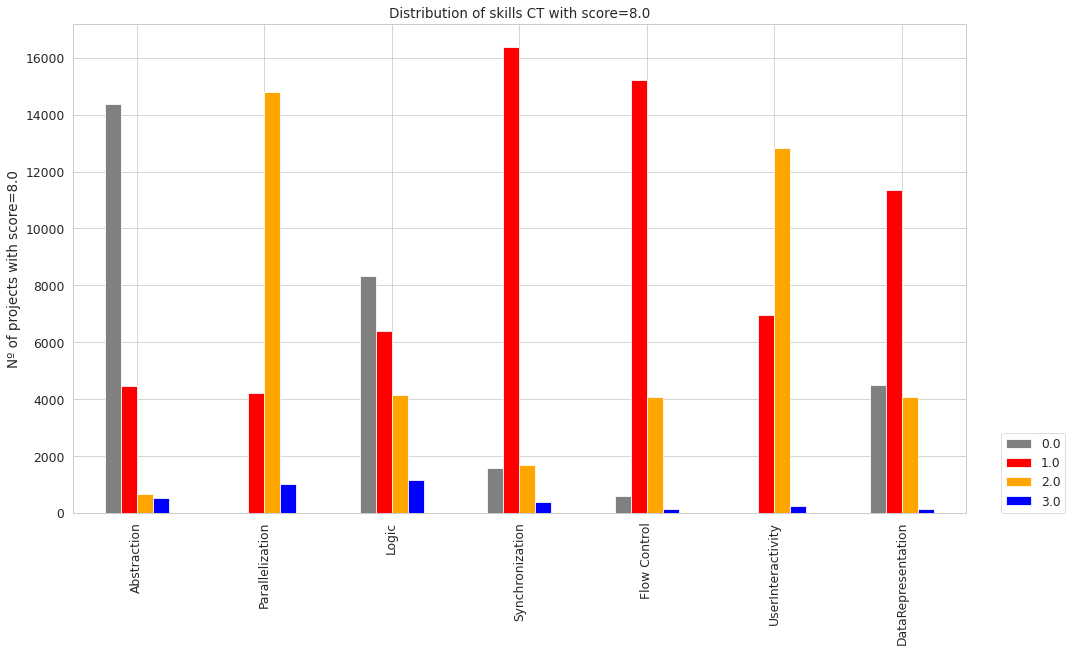

Matriz de covarianza entre las 7 dimensiones para la puntuación 8.0


,Abstraction,Parallelization,Logic,Synchronization,Flow Control,UserInteractivity,DataRepresentation
Abstraction,4.243652e+07,-2.368468e+07,1.716586e+07,-1.127475e+06,-7.059388e+06,-2.015841e+07,5.953778e+06
Parallelization,-2.368468e+07,4.585820e+07,-3.548856e+06,-1.856772e+06,8.115200e+06,3.974717e+07,2.619468e+06
Logic,1.716586e+07,-3.548856e+06,9.534078e+06,8.300897e+06,6.310417e+06,-7.359094e+05,8.910582e+06
Synchronization,-1.127475e+06,-1.856772e+06,8.300897e+06,5.777997e+07,5.229654e+07,1.180636e+07,3.314021e+07
Flow Control,-7.059388e+06,8.115200e+06,6.310417e+06,5.229654e+07,4.945962e+07,1.924111e+07,3.051058e+07
UserInteractivity,-2.015841e+07,3.974717e+07,-7.359094e+05,1.180636e+07,1.924111e+07,3.759376e+07,1.024128e+07
DataRepresentation,5.953778e+06,2.619468e+06,8.910582e+06,3.314021e+07,3.051058e+07,1.024128e+07,2.170727e+07


Matriz de correlación entre las 7 dimensiones para la puntuación 8.0


,Abstraction,Parallelization,Logic,Synchronization,Flow Control,UserInteractivity,DataRepresentation
Abstraction,1.000000,-0.536895,0.853408,-0.022769,-0.154089,-0.504694,0.196164
Parallelization,-0.536895,1.000000,-0.169723,-0.036071,0.170398,0.957282,0.083024
Logic,0.853408,-0.169723,1.000000,0.353669,0.290598,-0.038871,0.619390
Synchronization,-0.022769,-0.036071,0.353669,1.000000,0.978270,0.253320,0.935759
Flow Control,-0.154089,0.170398,0.290598,0.978270,1.000000,0.446218,0.931156
UserInteractivity,-0.504694,0.957282,-0.038871,0.253320,0.446218,1.000000,0.358504
DataRepresentation,0.196164,0.083024,0.619390,0.935759,0.931156,0.358504,1.000000


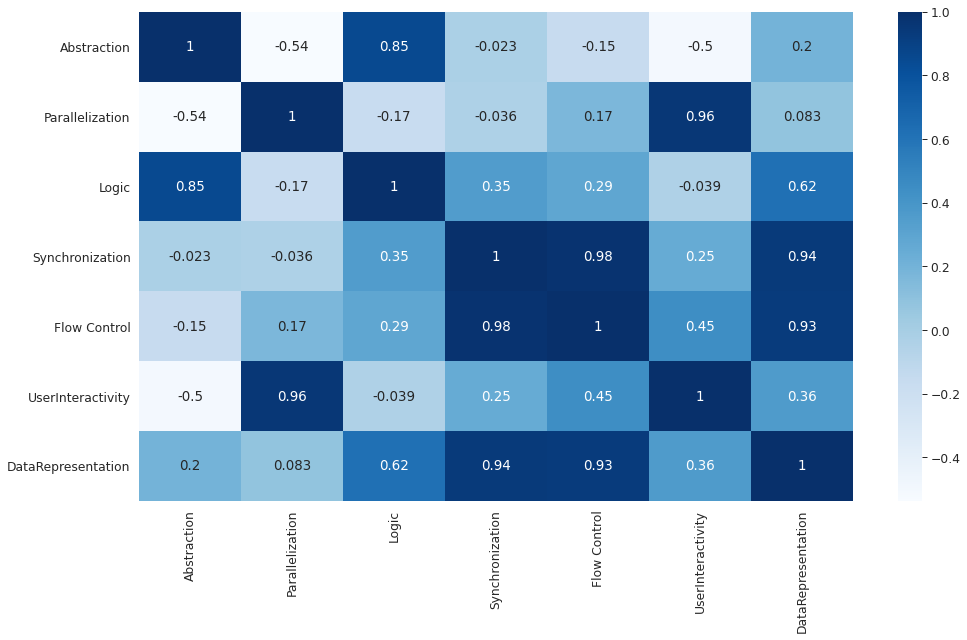

--> Score: 9.0


,Abstraction,Parallelization,Logic,Synchronization,Flow Control,UserInteractivity,DataRepresentation
2,0.0,1.0,2.0,1.0,1.0,1.0,3.0
67,1.0,2.0,2.0,1.0,1.0,1.0,1.0
68,1.0,2.0,2.0,1.0,1.0,1.0,1.0
75,0.0,2.0,1.0,1.0,1.0,2.0,2.0
121,3.0,2.0,0.0,1.0,2.0,1.0,0.0
...,...,...,...,...,...,...,...
269605,0.0,2.0,1.0,1.0,1.0,2.0,2.0
269608,1.0,1.0,1.0,1.0,1.0,2.0,2.0
269619,0.0,2.0,1.0,1.0,1.0,2.0,2.0
269624,2.0,2.0,0.0,1.0,2.0,2.0,0.0


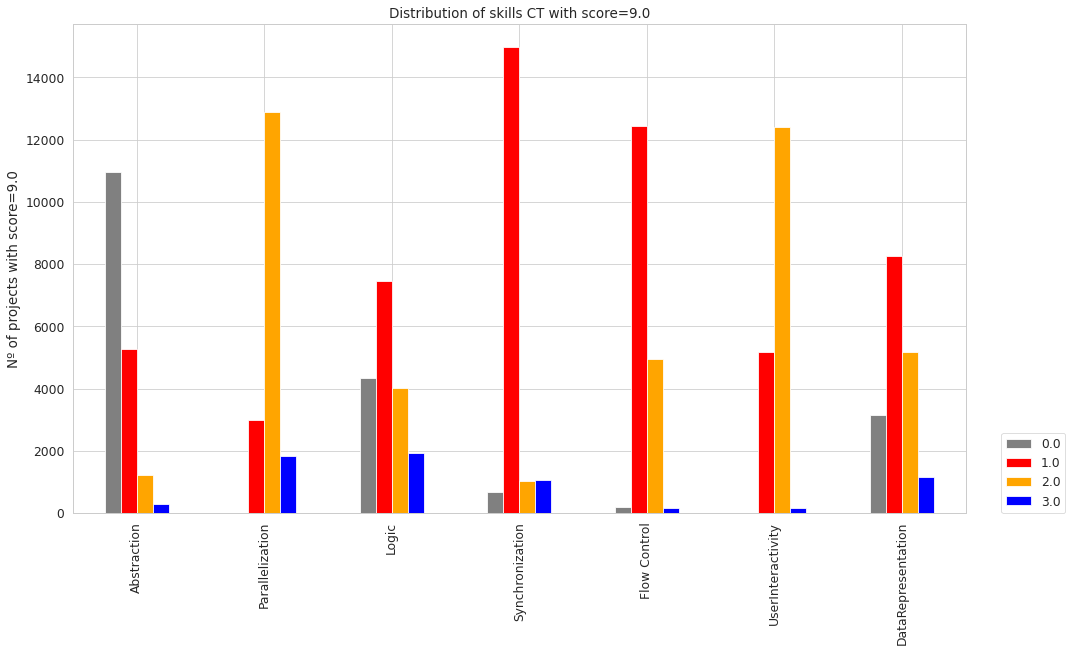

Matriz de covarianza entre las 7 dimensiones para la puntuación 9.0


,Abstraction,Parallelization,Logic,Synchronization,Flow Control,UserInteractivity,DataRepresentation
Abstraction,2.367003e+07,-1.552371e+07,4.564419e+06,3.066761e+06,-1.701306e+06,-1.202348e+07,2002492.25
Parallelization,-1.552371e+07,3.334509e+07,-3.436561e+05,-6.230069e+06,7.539633e+06,3.233733e+07,5031493.25
Logic,4.564419e+06,-3.436561e+05,5.208735e+06,1.404591e+07,1.167993e+07,3.329846e+06,6526400.25
Synchronization,3.066761e+06,-6.230069e+06,1.404591e+07,4.941994e+07,3.764041e+07,3.860584e+06,17850174.25
Flow Control,-1.701306e+06,7.539633e+06,1.167993e+07,3.764041e+07,3.347405e+07,1.562998e+07,16778662.25
UserInteractivity,-1.202348e+07,3.233733e+07,3.329846e+06,3.860584e+06,1.562998e+07,3.393830e+07,9515411.25
DataRepresentation,2.002492e+06,5.031493e+06,6.526400e+06,1.785017e+07,1.677866e+07,9.515411e+06,9190034.25


Matriz de correlación entre las 7 dimensiones para la puntuación 9.0


,Abstraction,Parallelization,Logic,Synchronization,Flow Control,UserInteractivity,DataRepresentation
Abstraction,1.000000,-0.552561,0.411074,0.089666,-0.060441,-0.424215,0.135773
Parallelization,-0.552561,1.000000,-0.026076,-0.153471,0.225673,0.961265,0.287424
Logic,0.411074,-0.026076,1.000000,0.875452,0.884545,0.250445,0.943298
Synchronization,0.089666,-0.153471,0.875452,1.000000,0.925442,0.094266,0.837592
Flow Control,-0.060441,0.225673,0.884545,0.925442,1.000000,0.463724,0.956631
UserInteractivity,-0.424215,0.961265,0.250445,0.094266,0.463724,1.000000,0.538796
DataRepresentation,0.135773,0.287424,0.943298,0.837592,0.956631,0.538796,1.000000


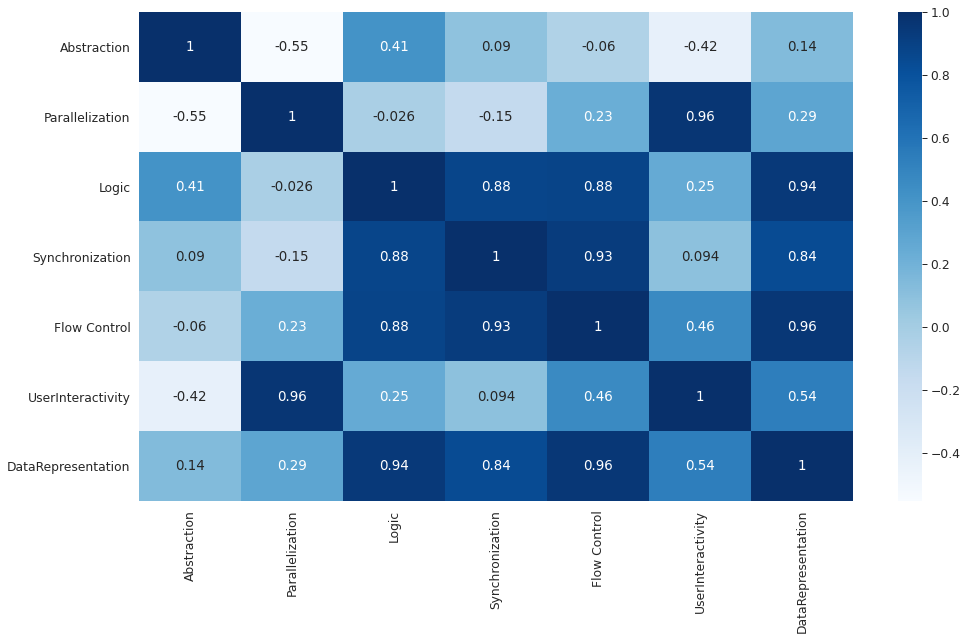

--> Score: 10.0


,Abstraction,Parallelization,Logic,Synchronization,Flow Control,UserInteractivity,DataRepresentation
14,0.0,1.0,3.0,1.0,1.0,1.0,3.0
15,0.0,1.0,3.0,1.0,1.0,1.0,3.0
34,1.0,2.0,1.0,1.0,2.0,2.0,1.0
86,2.0,2.0,0.0,1.0,3.0,2.0,0.0
106,1.0,2.0,2.0,1.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...
269704,1.0,1.0,1.0,1.0,2.0,2.0,2.0
269748,0.0,1.0,3.0,2.0,2.0,2.0,0.0
269789,2.0,2.0,2.0,2.0,2.0,0.0,0.0
269805,0.0,1.0,3.0,1.0,1.0,1.0,3.0


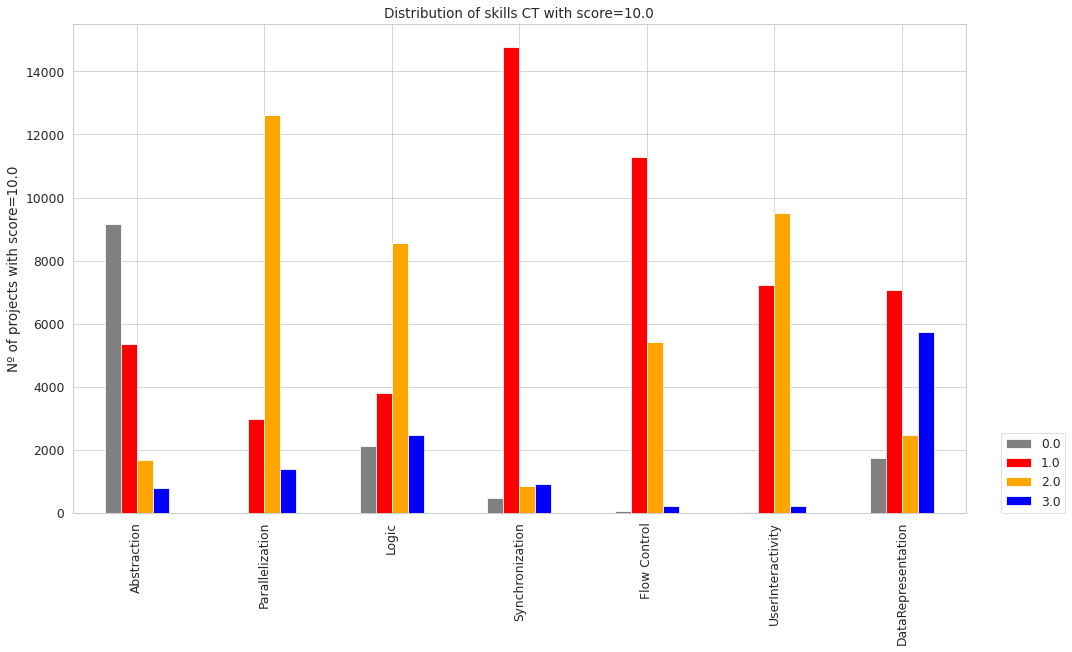

Matriz de covarianza entre las 7 dimensiones para la puntuación 10.0


,Abstraction,Parallelization,Logic,Synchronization,Flow Control,UserInteractivity,DataRepresentation
Abstraction,1.469554e+07,-1.132026e+07,-5.288264e+06,4.460656e+06,-5.692073e+05,-5.692150e+06,-3.273107e+06
Parallelization,-1.132026e+07,3.264387e+07,1.693343e+07,-5.479647e+06,9.971166e+06,2.322069e+07,-4.005776e+06
Logic,-5.288264e+06,1.693343e+07,8.833796e+06,-1.771196e+06,5.995853e+06,1.251718e+07,-2.059659e+06
Synchronization,4.460656e+06,-5.479647e+06,-1.771196e+06,4.924724e+07,3.314050e+07,1.426209e+07,1.343479e+07
Flow Control,-5.692073e+05,9.971166e+06,5.995853e+06,3.314050e+07,2.822786e+07,2.031223e+07,7.446081e+06
UserInteractivity,-5.692150e+06,2.322069e+07,1.251718e+07,1.426209e+07,2.031223e+07,2.352544e+07,1.244359e+06
DataRepresentation,-3.273107e+06,-4.005776e+06,-2.059659e+06,1.343479e+07,7.446081e+06,1.244359e+06,6.541735e+06


Matriz de correlación entre las 7 dimensiones para la puntuación 10.0


,Abstraction,Parallelization,Logic,Synchronization,Flow Control,UserInteractivity,DataRepresentation
Abstraction,1.000000,-0.516848,-0.464137,0.165812,-0.027947,-0.306136,-0.333827
Parallelization,-0.516848,1.000000,0.997173,-0.136666,0.328478,0.837925,-0.274119
Logic,-0.464137,0.997173,1.000000,-0.084918,0.379698,0.868289,-0.270941
Synchronization,0.165812,-0.136666,-0.084918,1.000000,0.888851,0.419009,0.748503
Flow Control,-0.027947,0.328478,0.379698,0.888851,1.000000,0.788224,0.547952
UserInteractivity,-0.306136,0.837925,0.868289,0.419009,0.788224,1.000000,0.100307
DataRepresentation,-0.333827,-0.274119,-0.270941,0.748503,0.547952,0.100307,1.000000


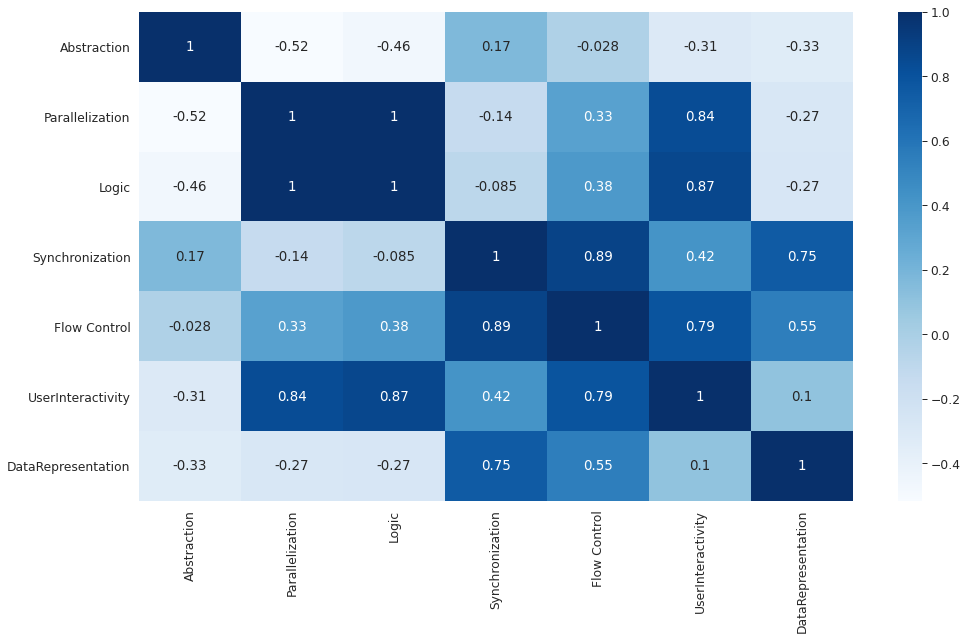

--> Score: 11.0


,Abstraction,Parallelization,Logic,Synchronization,Flow Control,UserInteractivity,DataRepresentation
11,1.0,3.0,1.0,3.0,1.0,1.0,1.0
31,1.0,2.0,2.0,1.0,1.0,1.0,3.0
136,2.0,2.0,2.0,1.0,1.0,2.0,1.0
137,2.0,2.0,2.0,1.0,1.0,2.0,1.0
138,2.0,2.0,2.0,1.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...
269433,3.0,3.0,1.0,1.0,1.0,1.0,1.0
269601,0.0,3.0,2.0,1.0,1.0,1.0,3.0
269602,0.0,3.0,2.0,1.0,1.0,1.0,3.0
269634,0.0,3.0,2.0,1.0,1.0,2.0,2.0


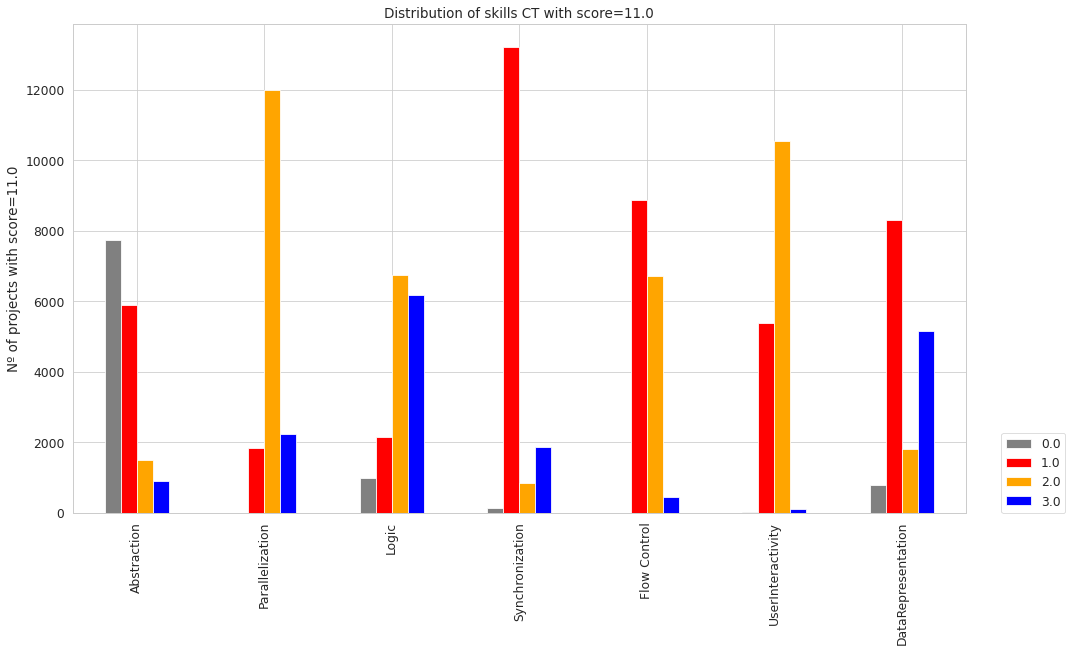

Matriz de covarianza entre las 7 dimensiones para la puntuación 11.0


,Abstraction,Parallelization,Logic,Synchronization,Flow Control,UserInteractivity,DataRepresentation
Abstraction,1.112945e+07,-1.116208e+07,-9.430746e+06,5.822428e+06,-4.988097e+05,-5.535397e+06,-6.746487e+05
Parallelization,-1.116208e+07,2.913838e+07,1.131055e+07,-8.602364e+06,1.112516e+07,2.398418e+07,-5.316741e+06
Logic,-9.430746e+06,1.131055e+07,8.213326e+06,-6.251491e+06,8.724257e+05,6.264958e+06,-5.911263e+05
Synchronization,5.822428e+06,-8.602364e+06,-6.251491e+06,3.805415e+07,1.977120e+07,5.257791e+06,1.879492e+07
Flow Control,-4.988097e+05,1.112516e+07,8.724257e+05,1.977120e+07,1.989002e+07,1.804954e+07,7.900469e+06
UserInteractivity,-5.535397e+06,2.398418e+07,6.264958e+06,5.257791e+06,1.804954e+07,2.518162e+07,-2.847233e+04
DataRepresentation,-6.746487e+05,-5.316741e+06,-5.911263e+05,1.879492e+07,7.900469e+06,-2.847233e+04,1.164732e+07


Matriz de correlación entre las 7 dimensiones para la puntuación 11.0


,Abstraction,Parallelization,Logic,Synchronization,Flow Control,UserInteractivity,DataRepresentation
Abstraction,1.000000,-0.619834,-0.986392,0.282922,-0.033526,-0.330651,-0.059255
Parallelization,-0.619834,1.000000,0.731125,-0.258335,0.462121,0.885422,-0.288602
Logic,-0.986392,0.731125,1.000000,-0.353609,0.068258,0.435629,-0.060438
Synchronization,0.282922,-0.258335,-0.353609,1.000000,0.718645,0.169848,0.892743
Flow Control,-0.033526,0.462121,0.068258,0.718645,1.000000,0.806505,0.519066
UserInteractivity,-0.330651,0.885422,0.435629,0.169848,0.806505,1.000000,-0.001663
DataRepresentation,-0.059255,-0.288602,-0.060438,0.892743,0.519066,-0.001663,1.000000


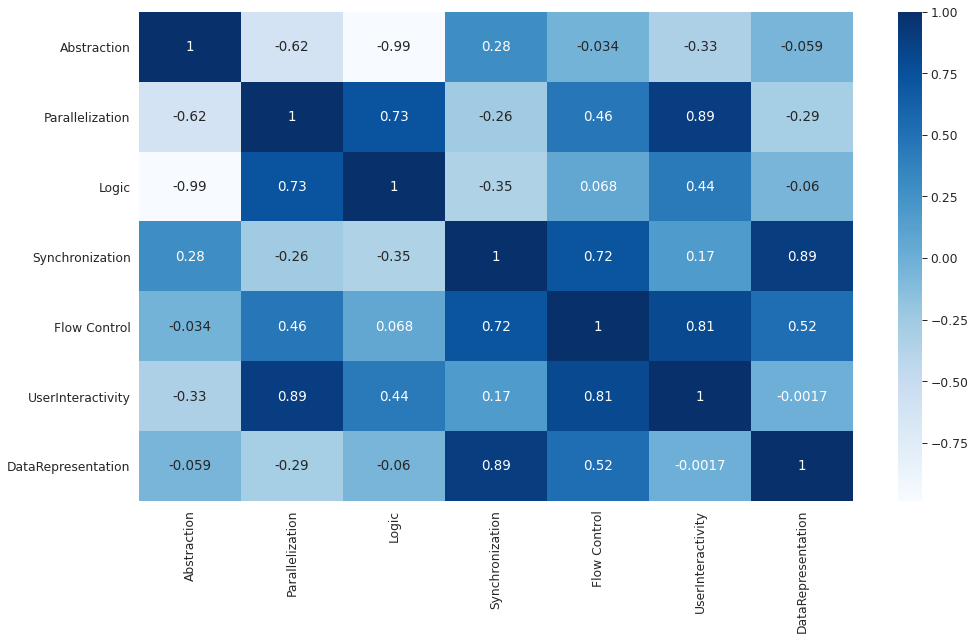

--> Score: 12.0


,Abstraction,Parallelization,Logic,Synchronization,Flow Control,UserInteractivity,DataRepresentation
6,1.0,3.0,2.0,1.0,1.0,2.0,2.0
9,1.0,3.0,1.0,3.0,2.0,1.0,1.0
10,1.0,3.0,1.0,3.0,2.0,1.0,1.0
12,1.0,2.0,1.0,3.0,2.0,2.0,1.0
73,1.0,2.0,2.0,1.0,1.0,2.0,3.0
...,...,...,...,...,...,...,...
269690,2.0,2.0,2.0,1.0,2.0,2.0,1.0
269691,2.0,2.0,2.0,1.0,2.0,2.0,1.0
269692,2.0,2.0,2.0,1.0,2.0,2.0,1.0
269693,2.0,2.0,2.0,1.0,2.0,2.0,1.0


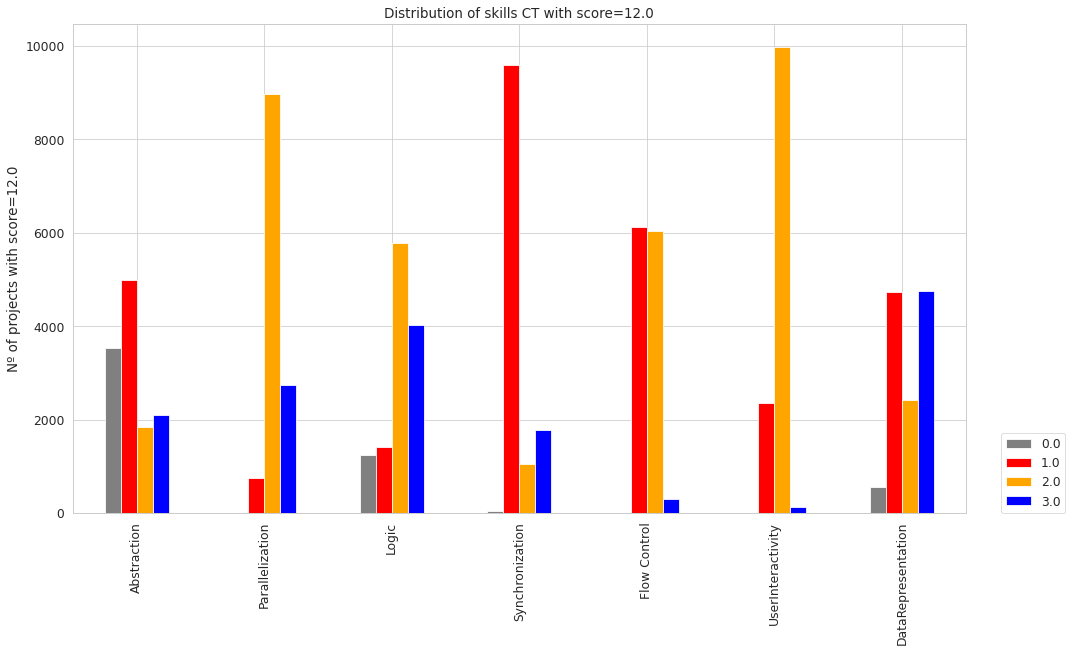

Matriz de covarianza entre las 7 dimensiones para la puntuación 12.0


,Abstraction,Parallelization,Logic,Synchronization,Flow Control,UserInteractivity,DataRepresentation
Abstraction,2.105599e+06,-4.258755e+06,-2.762811e+06,4.925323e+06,1.164866e+06,-2.783259e+06,3.847719e+05
Parallelization,-4.258755e+06,1.658192e+07,8.381214e+06,-5.816285e+06,6.890079e+06,1.758740e+07,-1.932758e+05
Logic,-2.762811e+06,8.381214e+06,4.790887e+06,-4.002080e+06,1.965071e+06,7.552080e+06,5.634782e+05
Synchronization,4.925323e+06,-5.816285e+06,-4.002080e+06,1.911610e+07,8.897696e+06,-1.863763e+06,5.864834e+06
Flow Control,1.164866e+06,6.890079e+06,1.965071e+06,8.897696e+06,1.171472e+07,1.194151e+07,2.059232e+06
UserInteractivity,-2.783259e+06,1.758740e+07,7.552080e+06,-1.863763e+06,1.194151e+07,2.208053e+07,-9.802071e+05
DataRepresentation,3.847719e+05,-1.932758e+05,5.634782e+05,5.864834e+06,2.059232e+06,-9.802071e+05,4.107210e+06


Matriz de correlación entre las 7 dimensiones para la puntuación 12.0


,Abstraction,Parallelization,Logic,Synchronization,Flow Control,UserInteractivity,DataRepresentation
Abstraction,1.000000,-0.720738,-0.869872,0.776332,0.234543,-0.408189,0.130840
Parallelization,-0.720738,1.000000,0.940333,-0.326685,0.494357,0.919136,-0.023420
Logic,-0.869872,0.940333,1.000000,-0.418194,0.262304,0.734267,0.127027
Synchronization,0.776332,-0.326685,-0.418194,1.000000,0.594582,-0.090717,0.661885
Flow Control,0.234543,0.494357,0.262304,0.594582,1.000000,0.742487,0.296870
UserInteractivity,-0.408189,0.919136,0.734267,-0.090717,0.742487,1.000000,-0.102929
DataRepresentation,0.130840,-0.023420,0.127027,0.661885,0.296870,-0.102929,1.000000


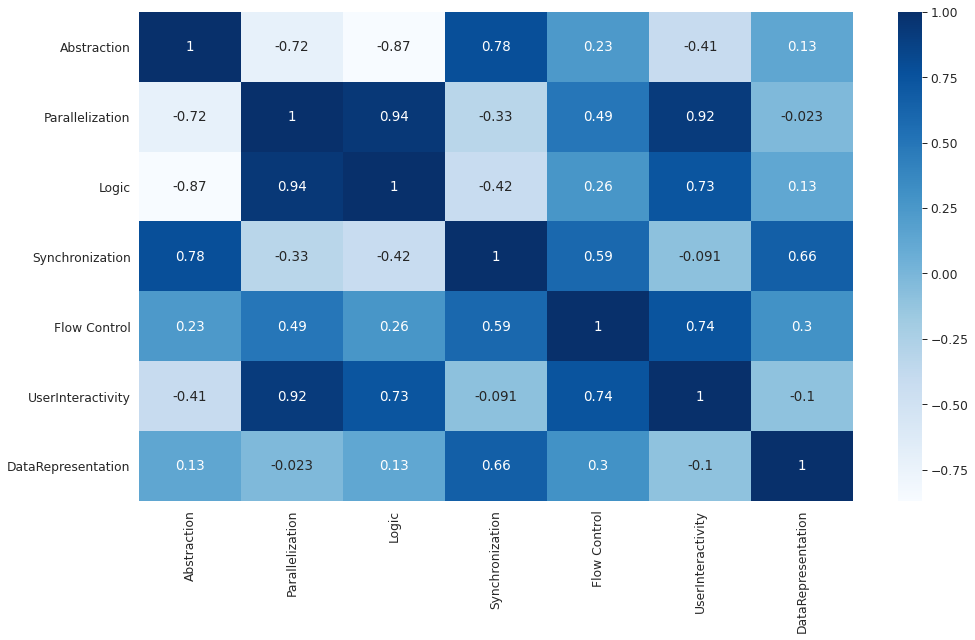

--> Score: 13.0


,Abstraction,Parallelization,Logic,Synchronization,Flow Control,UserInteractivity,DataRepresentation
5,2.0,2.0,2.0,1.0,1.0,2.0,3.0
8,1.0,2.0,3.0,1.0,1.0,2.0,3.0
16,1.0,3.0,2.0,1.0,1.0,2.0,3.0
35,1.0,2.0,3.0,1.0,1.0,2.0,3.0
44,1.0,2.0,3.0,1.0,1.0,2.0,3.0
...,...,...,...,...,...,...,...
269837,1.0,2.0,2.0,1.0,2.0,2.0,3.0
269838,1.0,2.0,2.0,1.0,2.0,2.0,3.0
269839,1.0,2.0,2.0,1.0,2.0,2.0,3.0
269840,1.0,2.0,2.0,1.0,2.0,2.0,3.0


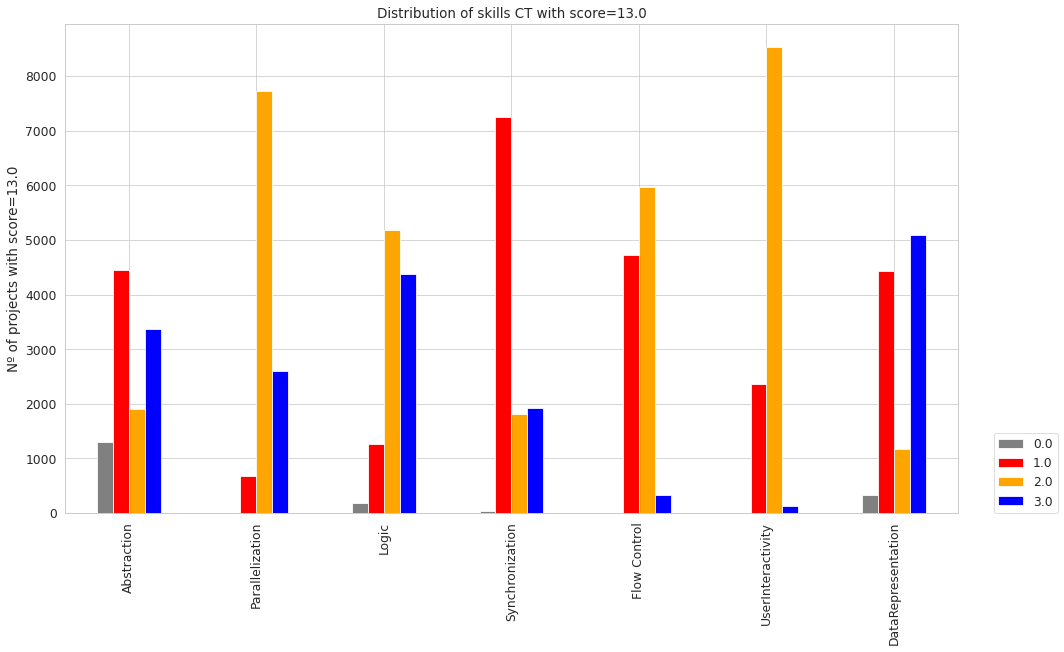

Matriz de covarianza entre las 7 dimensiones para la puntuación 13.0


,Abstraction,Parallelization,Logic,Synchronization,Flow Control,UserInteractivity,DataRepresentation
Abstraction,2.044001e+06,-1.272637e+06,3.892433e+04,3.971530e+06,1.050740e+06,-1.056704e+06,3.048765e+06
Parallelization,-1.272637e+06,1.218911e+07,7.341051e+06,-2.105712e+06,6.621952e+06,1.249817e+07,-1.656478e+06
Logic,3.892433e+04,7.341051e+06,5.799575e+06,-1.123637e+06,2.674488e+06,5.822554e+06,1.220360e+06
Synchronization,3.971530e+06,-2.105712e+06,-1.123637e+06,9.714725e+06,5.107391e+06,8.296723e+05,4.540543e+06
Flow Control,1.050740e+06,6.621952e+06,2.674488e+06,5.107391e+06,9.222062e+06,1.058230e+07,-2.614843e+05
UserInteractivity,-1.056704e+06,1.249817e+07,5.822554e+06,8.296723e+05,1.058230e+07,1.599798e+07,-3.077009e+06
DataRepresentation,3.048765e+06,-1.656478e+06,1.220360e+06,4.540543e+06,-2.614843e+05,-3.077009e+06,5.526822e+06


Matriz de correlación entre las 7 dimensiones para la puntuación 13.0


,Abstraction,Parallelization,Logic,Synchronization,Flow Control,UserInteractivity,DataRepresentation
Abstraction,1.000000,-0.254963,0.011305,0.891255,0.242014,-0.184791,0.907080
Parallelization,-0.254963,1.000000,0.873120,-0.193508,0.624577,0.895010,-0.201819
Logic,0.011305,0.873120,1.000000,-0.149697,0.365703,0.604481,0.215552
Synchronization,0.891255,-0.193508,-0.149697,1.000000,0.539597,0.066552,0.619662
Flow Control,0.242014,0.624577,0.365703,0.539597,1.000000,0.871231,-0.036626
UserInteractivity,-0.184791,0.895010,0.604481,0.066552,0.871231,1.000000,-0.327234
DataRepresentation,0.907080,-0.201819,0.215552,0.619662,-0.036626,-0.327234,1.000000


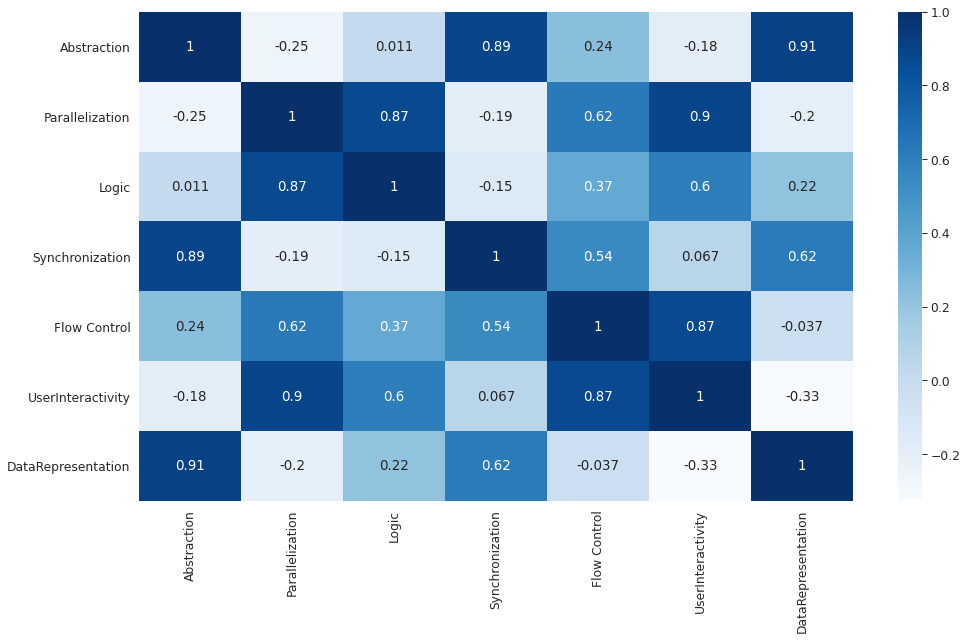

--> Score: 14.0


,Abstraction,Parallelization,Logic,Synchronization,Flow Control,UserInteractivity,DataRepresentation
13,1.0,2.0,2.0,2.0,2.0,2.0,3.0
40,1.0,3.0,2.0,2.0,1.0,2.0,3.0
83,3.0,2.0,1.0,3.0,3.0,2.0,0.0
143,1.0,3.0,2.0,3.0,2.0,2.0,1.0
144,2.0,2.0,2.0,1.0,2.0,2.0,3.0
...,...,...,...,...,...,...,...
269778,1.0,3.0,2.0,3.0,2.0,2.0,1.0
269779,1.0,3.0,2.0,3.0,2.0,2.0,1.0
269792,1.0,3.0,2.0,1.0,2.0,2.0,3.0
269826,1.0,2.0,2.0,1.0,3.0,2.0,3.0


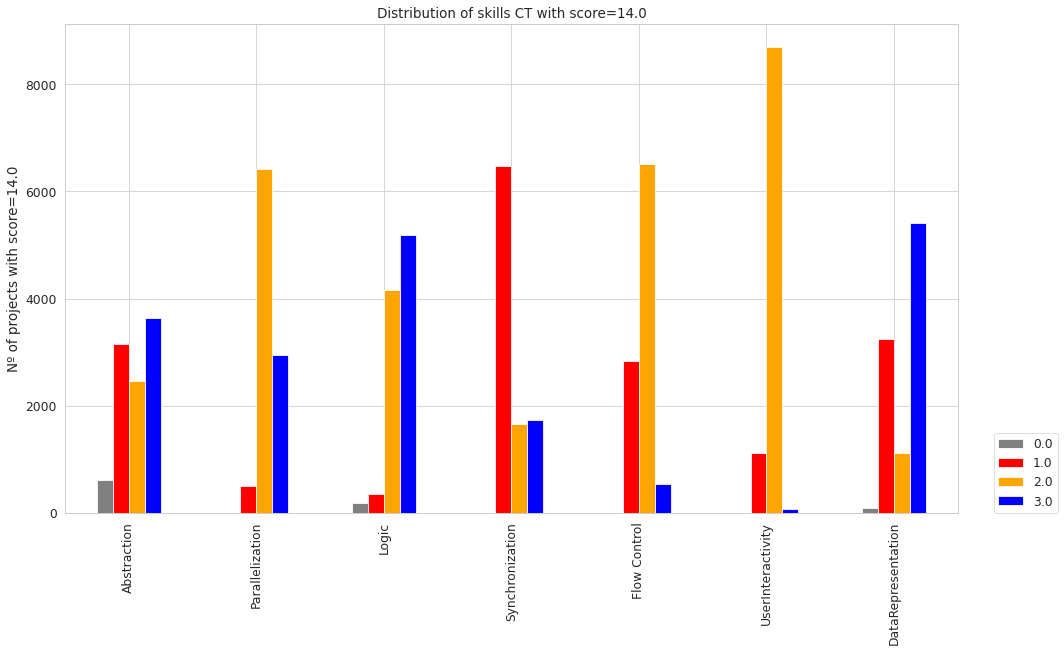

Matriz de covarianza entre las 7 dimensiones para la puntuación 14.0


,Abstraction,Parallelization,Logic,Synchronization,Flow Control,UserInteractivity,DataRepresentation
Abstraction,1.759074e+06,1.245582e+06,1.985090e+06,2.150134e+06,8.291162e+05,2.444796e+05,2.800310e+06
Parallelization,1.245582e+06,8.601679e+06,5.924807e+06,-1.785874e+06,6.808201e+06,1.073809e+07,1.176222e+05
Logic,1.985090e+06,5.924807e+06,6.640420e+06,-2.068430e+06,2.146974e+06,4.169214e+06,3.148139e+06
Synchronization,2.150134e+06,-1.785874e+06,-2.068430e+06,7.775242e+06,1.890705e+06,-8.882304e+05,2.647800e+06
Flow Control,8.291162e+05,6.808201e+06,2.146974e+06,1.890705e+06,8.771011e+06,1.180345e+07,-1.679213e+06
UserInteractivity,2.444796e+05,1.073809e+07,4.169214e+06,-8.882304e+05,1.180345e+07,1.748551e+07,-3.573901e+06
DataRepresentation,2.800310e+06,1.176222e+05,3.148139e+06,2.647800e+06,-1.679213e+06,-3.573901e+06,5.573248e+06


Matriz de correlación entre las 7 dimensiones para la puntuación 14.0


,Abstraction,Parallelization,Logic,Synchronization,Flow Control,UserInteractivity,DataRepresentation
Abstraction,1.000000,0.320213,0.580818,0.581388,0.211081,0.044082,0.894355
Parallelization,0.320213,1.000000,0.783944,-0.218375,0.783819,0.875581,0.016988
Logic,0.580818,0.783944,1.000000,-0.287863,0.281322,0.386916,0.517490
Synchronization,0.581388,-0.218375,-0.287863,1.000000,0.228951,-0.076178,0.402230
Flow Control,0.211081,0.783819,0.281322,0.228951,1.000000,0.953115,-0.240174
UserInteractivity,0.044082,0.875581,0.386916,-0.076178,0.953115,1.000000,-0.362034
DataRepresentation,0.894355,0.016988,0.517490,0.402230,-0.240174,-0.362034,1.000000


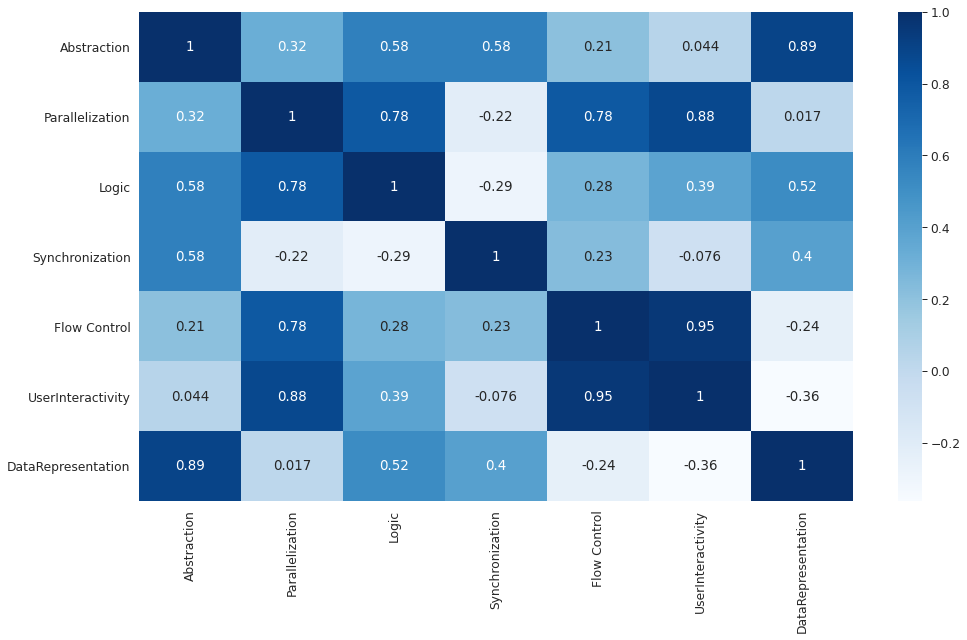

--> Score: 15.0


,Abstraction,Parallelization,Logic,Synchronization,Flow Control,UserInteractivity,DataRepresentation
29,1.0,3.0,3.0,2.0,1.0,2.0,3.0
49,3.0,2.0,2.0,1.0,2.0,2.0,3.0
77,3.0,2.0,2.0,1.0,2.0,2.0,3.0
139,3.0,3.0,2.0,1.0,3.0,2.0,1.0
141,2.0,3.0,2.0,1.0,2.0,2.0,3.0
...,...,...,...,...,...,...,...
269821,2.0,3.0,2.0,1.0,2.0,2.0,3.0
269822,2.0,3.0,2.0,1.0,2.0,2.0,3.0
269823,2.0,3.0,2.0,1.0,2.0,2.0,3.0
269824,2.0,3.0,2.0,1.0,2.0,2.0,3.0


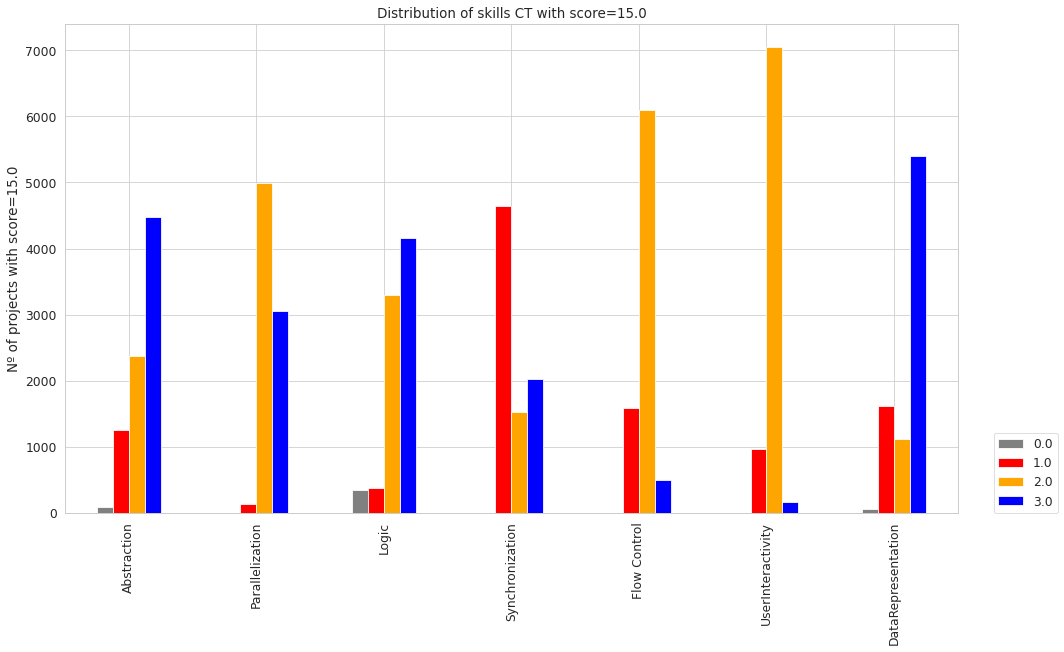

Matriz de covarianza entre las 7 dimensiones para la puntuación 15.0


,Abstraction,Parallelization,Logic,Synchronization,Flow Control,UserInteractivity,DataRepresentation
Abstraction,3.487152e+06,2.975011e+06,3.403212e+06,5.711580e+05,6.386113e+05,6.464410e+05,4.022746e+06
Parallelization,2.975011e+06,5.837423e+06,4.163702e+06,-7.674920e+05,5.143224e+06,6.362878e+06,1.845793e+06
Logic,3.403212e+06,4.163702e+06,3.914460e+06,-5.160093e+05,2.010295e+06,2.526349e+06,3.347583e+06
Synchronization,5.711580e+05,-7.674920e+05,-5.160093e+05,3.729366e+06,3.200933e+05,-3.795573e+05,1.115593e+06
Flow Control,6.386113e+05,5.143224e+06,2.010295e+06,3.200933e+05,7.747486e+06,9.290461e+06,-1.565096e+06
UserInteractivity,6.464410e+05,6.362878e+06,2.526349e+06,-3.795573e+05,9.290461e+06,1.129757e+07,-2.128084e+06
DataRepresentation,4.022746e+06,1.845793e+06,3.347583e+06,1.115593e+06,-1.565096e+06,-2.128084e+06,5.409939e+06


Matriz de correlación entre las 7 dimensiones para la puntuación 15.0


,Abstraction,Parallelization,Logic,Synchronization,Flow Control,UserInteractivity,DataRepresentation
Abstraction,1.000000,0.659390,0.921123,0.158381,0.122863,0.102991,0.926171
Parallelization,0.659390,1.000000,0.871030,-0.164492,0.764794,0.783521,0.328455
Logic,0.921123,0.871030,1.000000,-0.135053,0.365043,0.379896,0.727443
Synchronization,0.158381,-0.164492,-0.135053,1.000000,0.059550,-0.058475,0.248366
Flow Control,0.122863,0.764794,0.365043,0.059550,1.000000,0.993034,-0.241749
UserInteractivity,0.102991,0.783521,0.379896,-0.058475,0.993034,1.000000,-0.272207
DataRepresentation,0.926171,0.328455,0.727443,0.248366,-0.241749,-0.272207,1.000000


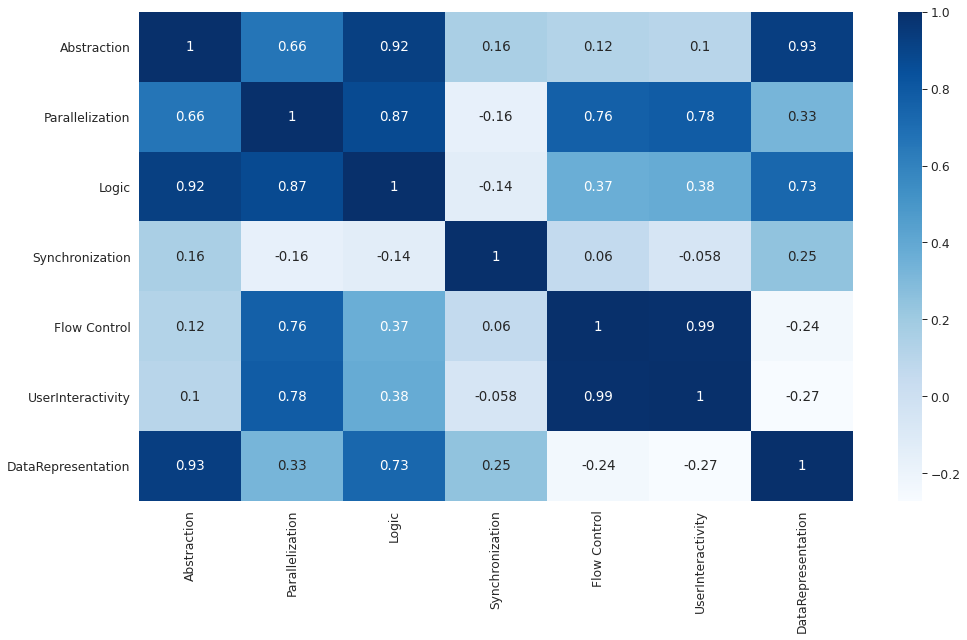

--> Score: 16.0


,Abstraction,Parallelization,Logic,Synchronization,Flow Control,UserInteractivity,DataRepresentation
24,2.0,3.0,3.0,1.0,2.0,2.0,3.0
98,2.0,3.0,2.0,1.0,3.0,2.0,3.0
234,3.0,1.0,2.0,2.0,3.0,2.0,3.0
370,3.0,2.0,3.0,1.0,2.0,2.0,3.0
457,3.0,3.0,2.0,1.0,2.0,2.0,3.0
...,...,...,...,...,...,...,...
269829,3.0,2.0,2.0,1.0,3.0,2.0,3.0
269830,3.0,2.0,2.0,1.0,3.0,2.0,3.0
269831,3.0,2.0,2.0,1.0,3.0,2.0,3.0
269832,3.0,2.0,2.0,1.0,3.0,2.0,3.0


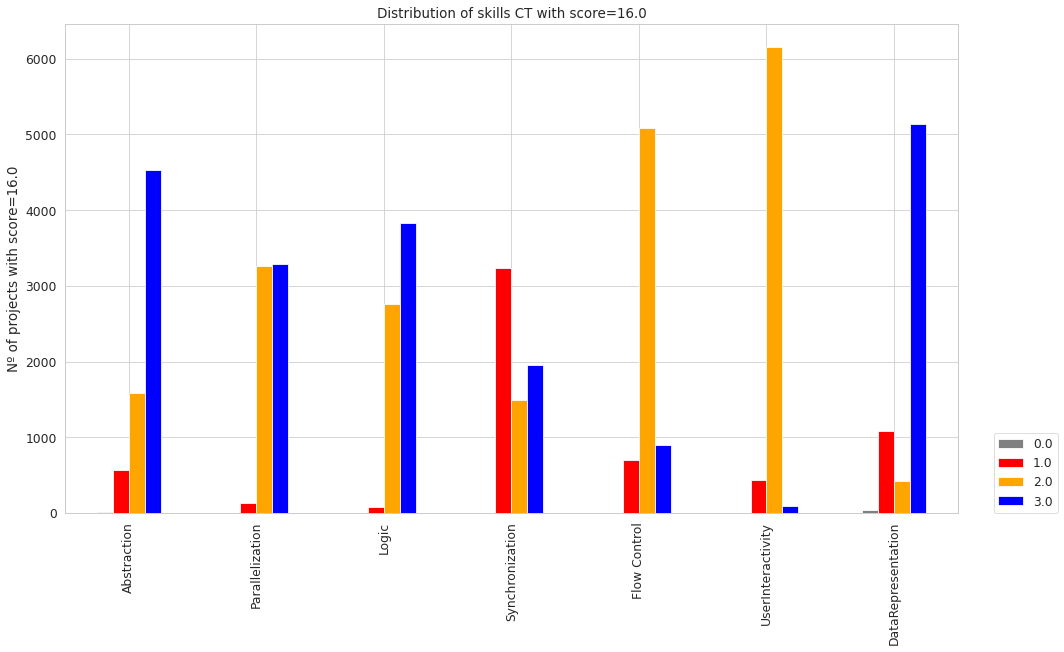

Matriz de covarianza entre las 7 dimensiones para la puntuación 16.0


,Abstraction,Parallelization,Logic,Synchronization,Flow Control,UserInteractivity,DataRepresentation
Abstraction,4.047954e+06,2.976295e+06,3.526700e+06,6.208053e+05,4.400813e+05,-2.581660e+05,4.456933e+06
Parallelization,2.976295e+06,3.427145e+06,3.479194e+06,1.869163e+05,2.824759e+06,3.095211e+06,2.410387e+06
Logic,3.526700e+06,3.479194e+06,3.713828e+06,2.384780e+05,2.130775e+06,2.083151e+06,3.254443e+06
Synchronization,6.208053e+05,1.869163e+05,2.384780e+05,1.784840e+06,1.457870e+05,-1.318157e+05,1.000879e+06
Flow Control,4.400813e+05,2.824759e+06,2.130775e+06,1.457870e+05,5.335438e+06,6.842155e+06,-1.216030e+06
UserInteractivity,-2.581660e+05,3.095211e+06,2.083151e+06,-1.318157e+05,6.842155e+06,8.965291e+06,-2.533169e+06
DataRepresentation,4.456933e+06,2.410387e+06,3.254443e+06,1.000879e+06,-1.216030e+06,-2.533169e+06,5.523654e+06


Matriz de correlación entre las 7 dimensiones para la puntuación 16.0


,Abstraction,Parallelization,Logic,Synchronization,Flow Control,UserInteractivity,DataRepresentation
Abstraction,1.000000,0.799083,0.909578,0.230961,0.094696,-0.042855,0.942552
Parallelization,0.799083,1.000000,0.975217,0.075576,0.660587,0.558395,0.553997
Logic,0.909578,0.975217,1.000000,0.092627,0.478676,0.361017,0.718543
Synchronization,0.230961,0.075576,0.092627,1.000000,0.047243,-0.032952,0.318764
Flow Control,0.094696,0.660587,0.478676,0.047243,1.000000,0.989295,-0.223999
UserInteractivity,-0.042855,0.558395,0.361017,-0.032952,0.989295,1.000000,-0.359972
DataRepresentation,0.942552,0.553997,0.718543,0.318764,-0.223999,-0.359972,1.000000


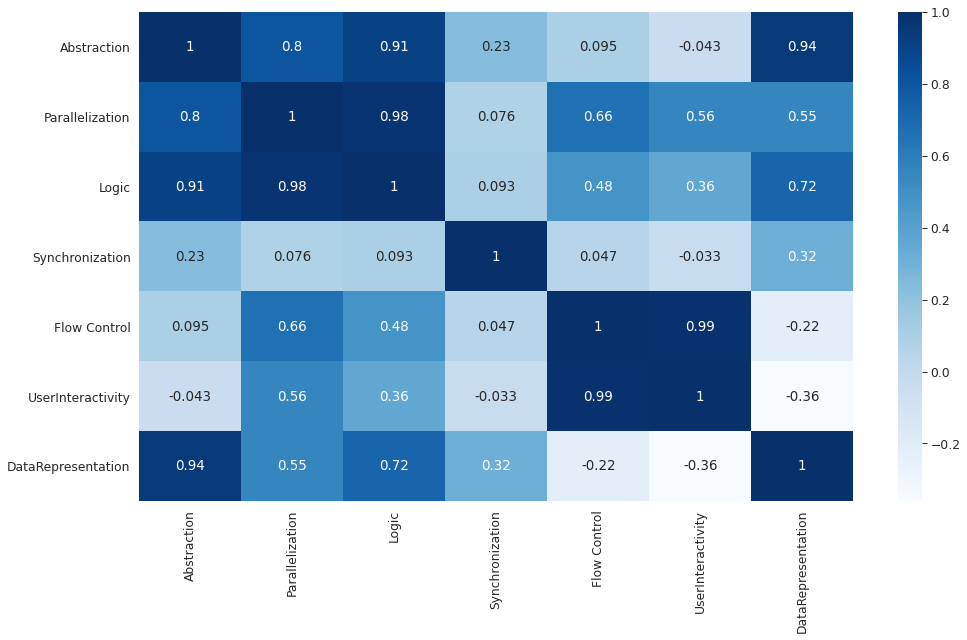

--> Score: 17.0


,Abstraction,Parallelization,Logic,Synchronization,Flow Control,UserInteractivity,DataRepresentation
19,3.0,2.0,3.0,2.0,2.0,2.0,3.0
50,3.0,2.0,2.0,3.0,2.0,2.0,3.0
385,3.0,2.0,3.0,3.0,2.0,2.0,2.0
386,3.0,2.0,3.0,3.0,2.0,2.0,2.0
517,3.0,3.0,3.0,1.0,2.0,2.0,3.0
...,...,...,...,...,...,...,...
269713,3.0,3.0,2.0,1.0,3.0,2.0,3.0
269714,3.0,3.0,2.0,1.0,3.0,2.0,3.0
269715,3.0,3.0,2.0,1.0,3.0,2.0,3.0
269833,3.0,3.0,2.0,1.0,3.0,2.0,3.0


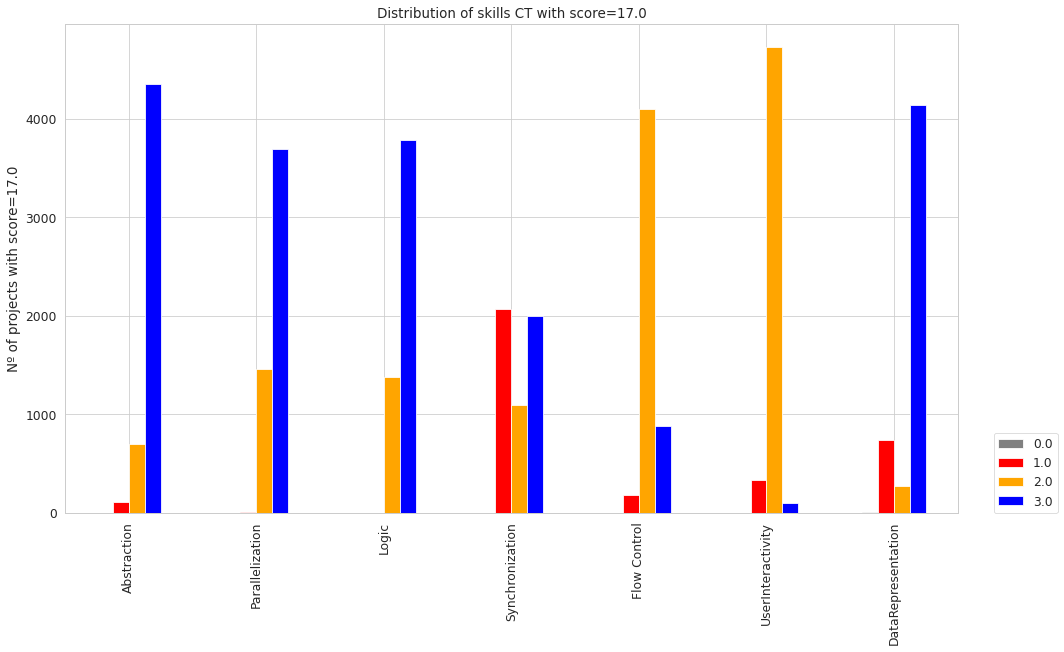

Matriz de covarianza entre las 7 dimensiones para la puntuación 17.0


,Abstraction,Parallelization,Logic,Synchronization,Flow Control,UserInteractivity,DataRepresentation
Abstraction,4.263768e+06,3.479580e+06,3.588024e+06,1.015036e+06,1.473958e+04,-9.680138e+05,3.883485e+06
Parallelization,3.479580e+06,3.038693e+06,3.107100e+06,7.825229e+05,8.584119e+05,2.032089e+05,3.015699e+06
Logic,3.588024e+06,3.107100e+06,3.180342e+06,8.071862e+05,7.718432e+05,7.615225e+04,3.128344e+06
Synchronization,1.015036e+06,7.825229e+05,8.071862e+05,9.370809e+05,-1.095408e+04,-1.985051e+05,1.152253e+06
Flow Control,1.473958e+04,8.584119e+05,7.718432e+05,-1.095408e+04,3.646029e+06,4.287900e+06,-5.886838e+05
UserInteractivity,-9.680138e+05,2.032089e+05,7.615225e+04,-1.985051e+05,4.287900e+06,5.273933e+06,-1.574479e+06
DataRepresentation,3.883485e+06,3.015699e+06,3.128344e+06,1.152253e+06,-5.886838e+05,-1.574479e+06,3.709588e+06


Matriz de correlación entre las 7 dimensiones para la puntuación 17.0


,Abstraction,Parallelization,Logic,Synchronization,Flow Control,UserInteractivity,DataRepresentation
Abstraction,1.000000,0.966689,0.974365,0.507804,0.003738,-0.204135,0.976477
Parallelization,0.966689,1.000000,0.999482,0.463730,0.257895,0.050761,0.898218
Logic,0.974365,0.999482,1.000000,0.467572,0.226664,0.018594,0.910783
Synchronization,0.507804,0.463730,0.467572,1.000000,-0.005926,-0.089293,0.618012
Flow Control,0.003738,0.257895,0.226664,-0.005926,1.000000,0.977839,-0.160070
UserInteractivity,-0.204135,0.050761,0.018594,-0.089293,0.977839,1.000000,-0.355965
DataRepresentation,0.976477,0.898218,0.910783,0.618012,-0.160070,-0.355965,1.000000


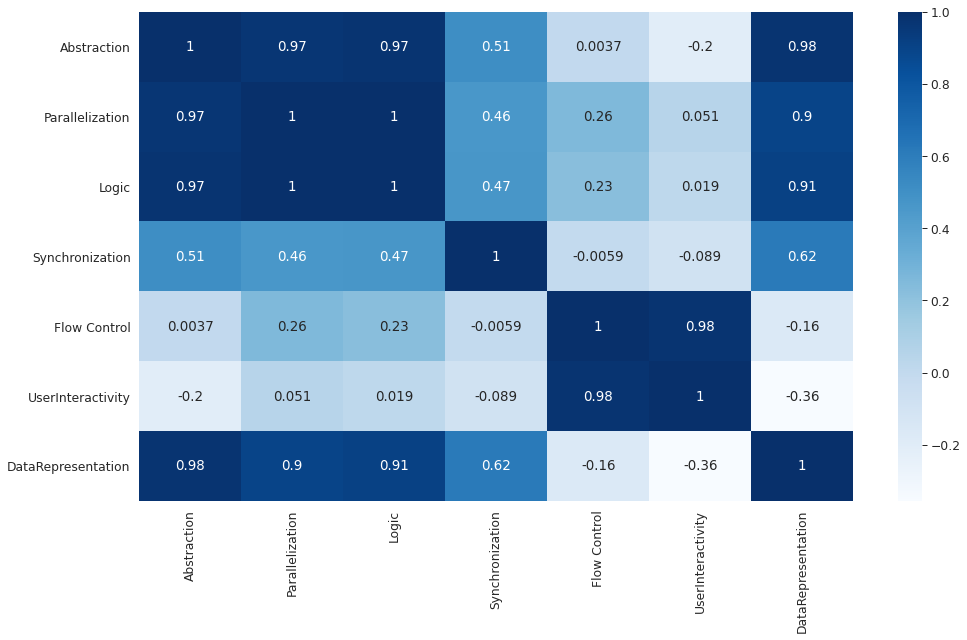

--> Score: 18.0


,Abstraction,Parallelization,Logic,Synchronization,Flow Control,UserInteractivity,DataRepresentation
102,3.0,3.0,2.0,3.0,2.0,2.0,3.0
103,3.0,3.0,2.0,3.0,2.0,2.0,3.0
109,3.0,3.0,2.0,2.0,3.0,2.0,3.0
134,3.0,3.0,3.0,1.0,3.0,2.0,3.0
369,3.0,3.0,3.0,1.0,3.0,2.0,3.0
...,...,...,...,...,...,...,...
269799,3.0,3.0,2.0,3.0,2.0,2.0,3.0
269800,3.0,3.0,2.0,3.0,2.0,2.0,3.0
269801,3.0,3.0,3.0,2.0,2.0,2.0,3.0
269810,2.0,3.0,3.0,2.0,3.0,2.0,3.0


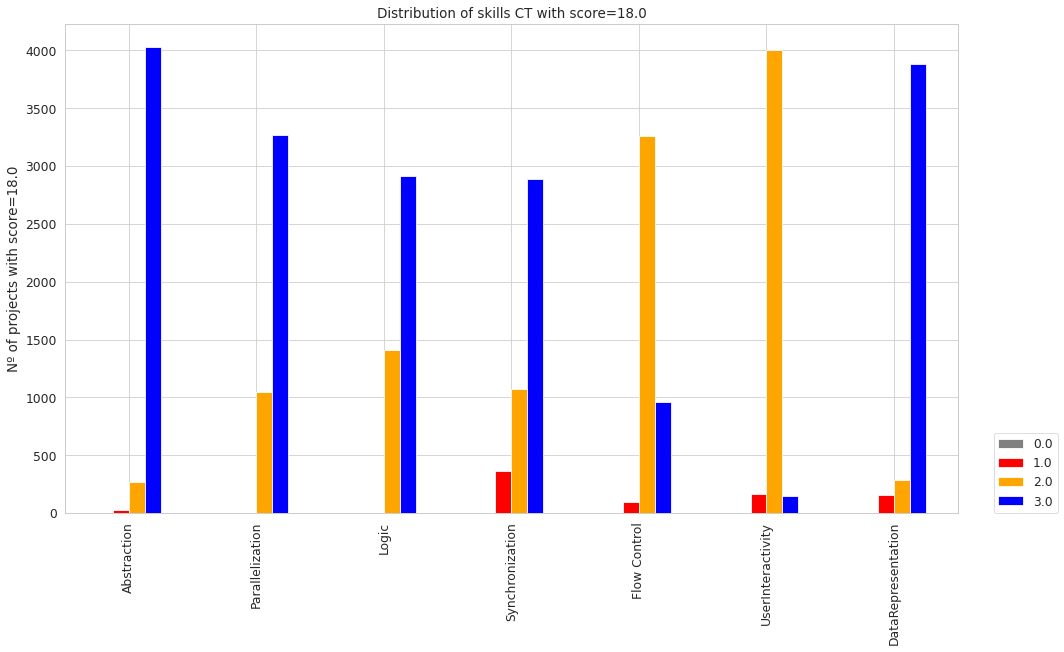

Matriz de covarianza entre las 7 dimensiones para la puntuación 18.0


,Abstraction,Parallelization,Logic,Synchronization,Flow Control,UserInteractivity,DataRepresentation
Abstraction,3.880084e+06,2.927202e+06,2.480621e+06,2.416210e+06,2.901025e+04,-1.001732e+06,3.682650e+06
Parallelization,2.927202e+06,2.372962e+06,2.110109e+06,1.961429e+06,6.370186e+05,8.156917e+03,2.771235e+06
Logic,2.480621e+06,2.110109e+06,1.931984e+06,1.746284e+06,9.106516e+05,4.674909e+05,2.344434e+06
Synchronization,2.416210e+06,1.961429e+06,1.746284e+06,1.643578e+06,5.457162e+05,3.479358e+04,2.295246e+06
Flow Control,2.901025e+04,6.370186e+05,9.106516e+05,5.457162e+05,2.302938e+06,2.853535e+06,4.770917e+03
UserInteractivity,-1.001732e+06,8.156917e+03,4.674909e+05,3.479358e+04,2.853535e+06,3.813814e+06,-9.778414e+05
DataRepresentation,3.682650e+06,2.771235e+06,2.344434e+06,2.295246e+06,4.770917e+03,-9.778414e+05,3.498358e+06


Matriz de correlación entre las 7 dimensiones para la puntuación 18.0


,Abstraction,Parallelization,Logic,Synchronization,Flow Control,UserInteractivity,DataRepresentation
Abstraction,1.000000,0.964688,0.906021,0.956795,0.009705,-0.260406,0.999557
Parallelization,0.964688,1.000000,0.985502,0.993190,0.272499,0.002711,0.961825
Logic,0.906021,0.985502,1.000000,0.979981,0.431727,0.172223,0.901787
Synchronization,0.956795,0.993190,0.979981,1.000000,0.280499,0.013897,0.957198
Flow Control,0.009705,0.272499,0.431727,0.280499,1.000000,0.962858,0.001681
UserInteractivity,-0.260406,0.002711,0.172223,0.013897,0.962858,1.000000,-0.267705
DataRepresentation,0.999557,0.961825,0.901787,0.957198,0.001681,-0.267705,1.000000


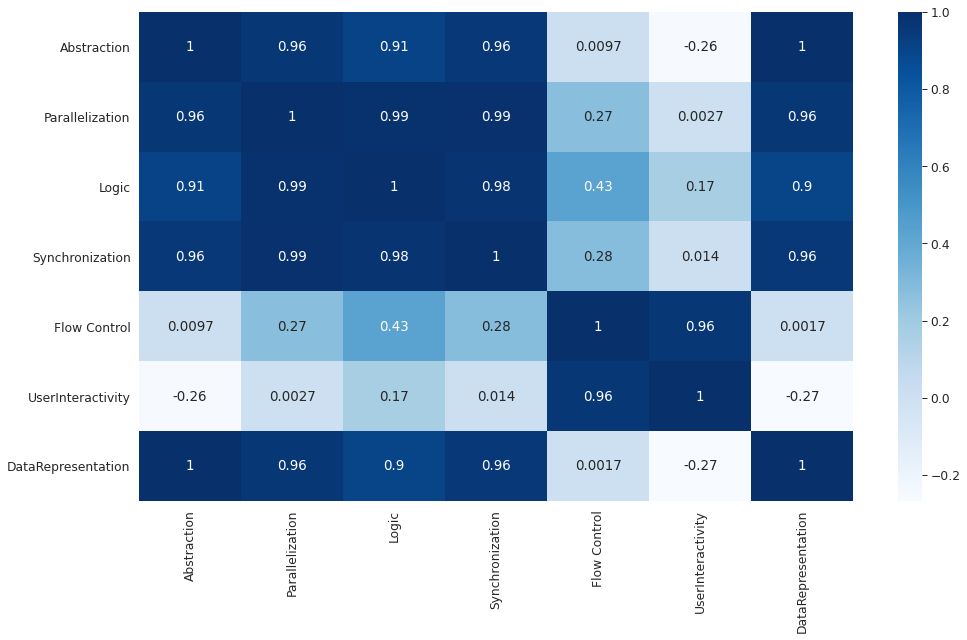

--> Score: 19.0


,Abstraction,Parallelization,Logic,Synchronization,Flow Control,UserInteractivity,DataRepresentation
20,3.0,3.0,3.0,3.0,2.0,2.0,3.0
101,2.0,3.0,3.0,3.0,3.0,2.0,3.0
105,3.0,3.0,3.0,2.0,3.0,2.0,3.0
108,3.0,2.0,3.0,3.0,3.0,2.0,3.0
111,3.0,3.0,2.0,3.0,3.0,2.0,3.0
...,...,...,...,...,...,...,...
269793,3.0,3.0,3.0,3.0,2.0,2.0,3.0
269794,3.0,3.0,3.0,3.0,2.0,2.0,3.0
269802,2.0,3.0,3.0,2.0,3.0,3.0,3.0
269803,2.0,3.0,3.0,2.0,3.0,3.0,3.0


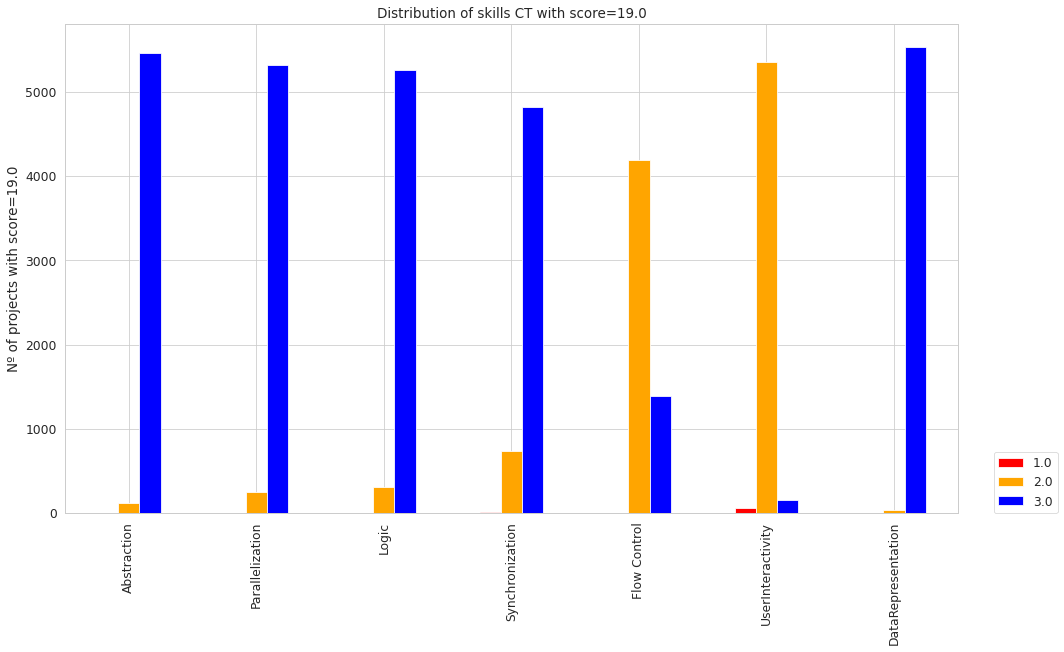

Matriz de covarianza entre las 7 dimensiones para la puntuación 19.0


,Abstraction,Parallelization,Logic,Synchronization,Flow Control,UserInteractivity,DataRepresentation
Abstraction,9.719649e+06,9.356393e+06,9.198804e+06,8.009411e+06,-1.156663e+06,-4.442571e+06,9.919860e+06
Parallelization,9.356393e+06,9.011633e+06,8.862068e+06,7.732243e+06,-9.661267e+05,-4.088767e+06,9.546268e+06
Logic,9.198804e+06,8.862068e+06,8.715984e+06,7.612001e+06,-8.834677e+05,-3.935278e+06,9.384195e+06
Synchronization,8.009411e+06,7.732243e+06,7.612001e+06,6.700009e+06,-2.893247e+05,-2.814718e+06,8.161535e+06
Flow Control,-1.156663e+06,-9.661267e+05,-8.834677e+05,-2.893247e+05,4.548209e+06,6.150737e+06,-1.265924e+06
UserInteractivity,-4.442571e+06,-4.088767e+06,-3.935278e+06,-2.814718e+06,6.150737e+06,9.196902e+06,-4.642984e+06
DataRepresentation,9.919860e+06,9.546268e+06,9.384195e+06,8.161535e+06,-1.265924e+06,-4.642984e+06,1.012585e+07


Matriz de correlación entre las 7 dimensiones para la puntuación 19.0


,Abstraction,Parallelization,Logic,Synchronization,Flow Control,UserInteractivity,DataRepresentation
Abstraction,1.000000,0.999727,0.999420,0.992516,-0.173965,-0.469881,0.999918
Parallelization,0.999727,1.000000,0.999943,0.995098,-0.150908,-0.449128,0.999347
Logic,0.999420,0.999943,1.000000,0.996100,-0.140318,-0.439538,0.998902
Synchronization,0.992516,0.995098,0.996100,1.000000,-0.052412,-0.358572,0.990874
Flow Control,-0.173965,-0.150908,-0.140318,-0.052412,1.000000,0.951012,-0.186540
UserInteractivity,-0.469881,-0.449128,-0.439538,-0.358572,0.951012,1.000000,-0.481128
DataRepresentation,0.999918,0.999347,0.998902,0.990874,-0.186540,-0.481128,1.000000


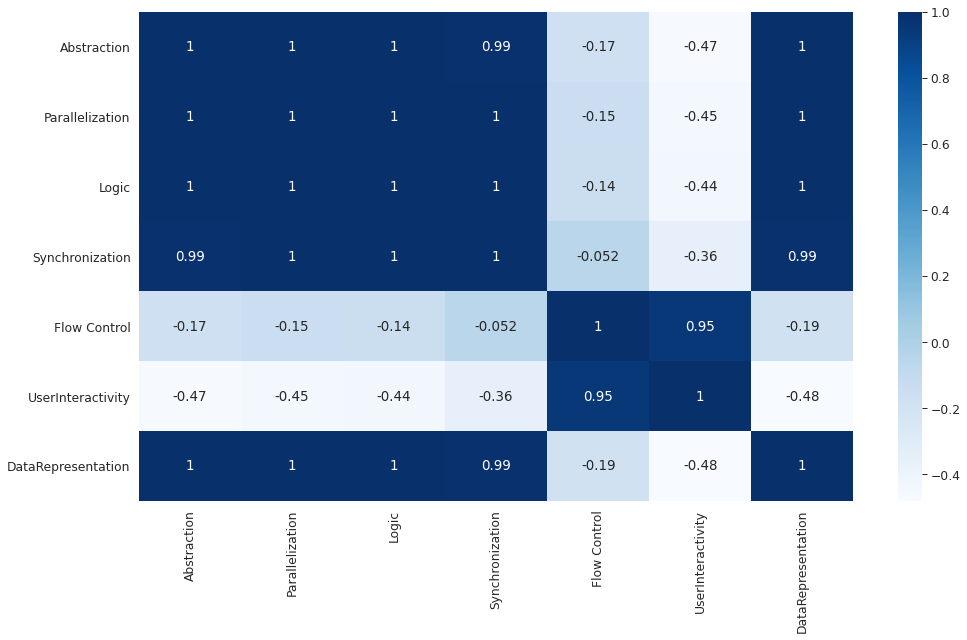

--> Score: 20.0


,Abstraction,Parallelization,Logic,Synchronization,Flow Control,UserInteractivity,DataRepresentation
54,3.0,3.0,3.0,3.0,3.0,2.0,3.0
59,3.0,3.0,3.0,3.0,3.0,2.0,3.0
60,3.0,3.0,3.0,3.0,3.0,2.0,3.0
61,3.0,3.0,3.0,3.0,3.0,2.0,3.0
62,3.0,3.0,3.0,3.0,3.0,2.0,3.0
...,...,...,...,...,...,...,...
269671,3.0,3.0,3.0,2.0,3.0,3.0,3.0
269685,3.0,3.0,3.0,2.0,3.0,3.0,3.0
269686,3.0,3.0,3.0,2.0,3.0,3.0,3.0
269729,3.0,3.0,2.0,3.0,3.0,3.0,3.0


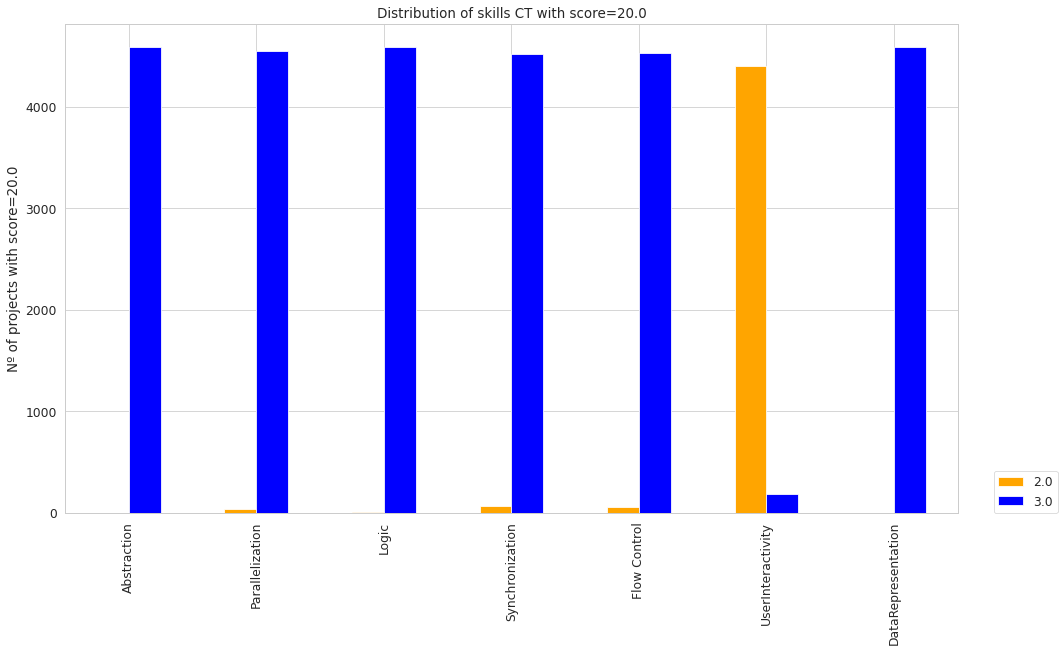

Matriz de covarianza entre las 7 dimensiones para la puntuación 20.0


,Abstraction,Parallelization,Logic,Synchronization,Flow Control,UserInteractivity,DataRepresentation
Abstraction,10520284.5,10332217.5,10501936.5,10190020.5,10240477.5,-9680863.5,10520284.5
Parallelization,10332217.5,10147512.5,10314197.5,10007857.5,10057412.5,-9507802.5,10332217.5
Logic,10501936.5,10314197.5,10483620.5,10172248.5,10222617.5,-9663979.5,10501936.5
Synchronization,10190020.5,10007857.5,10172248.5,9870124.5,9918997.5,-9376951.5,10190020.5
Flow Control,10240477.5,10057412.5,10222617.5,9918997.5,9968112.5,-9423382.5,10240477.5
UserInteractivity,-9680863.5,-9507802.5,-9663979.5,-9376951.5,-9423382.5,8908420.5,-9680863.5
DataRepresentation,10520284.5,10332217.5,10501936.5,10190020.5,10240477.5,-9680863.5,10520284.5


Matriz de correlación entre las 7 dimensiones para la puntuación 20.0


,Abstraction,Parallelization,Logic,Synchronization,Flow Control,UserInteractivity,DataRepresentation
Abstraction,1.0,1.0,1.0,1.0,1.0,-1.0,1.0
Parallelization,1.0,1.0,1.0,1.0,1.0,-1.0,1.0
Logic,1.0,1.0,1.0,1.0,1.0,-1.0,1.0
Synchronization,1.0,1.0,1.0,1.0,1.0,-1.0,1.0
Flow Control,1.0,1.0,1.0,1.0,1.0,-1.0,1.0
UserInteractivity,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0
DataRepresentation,1.0,1.0,1.0,1.0,1.0,-1.0,1.0


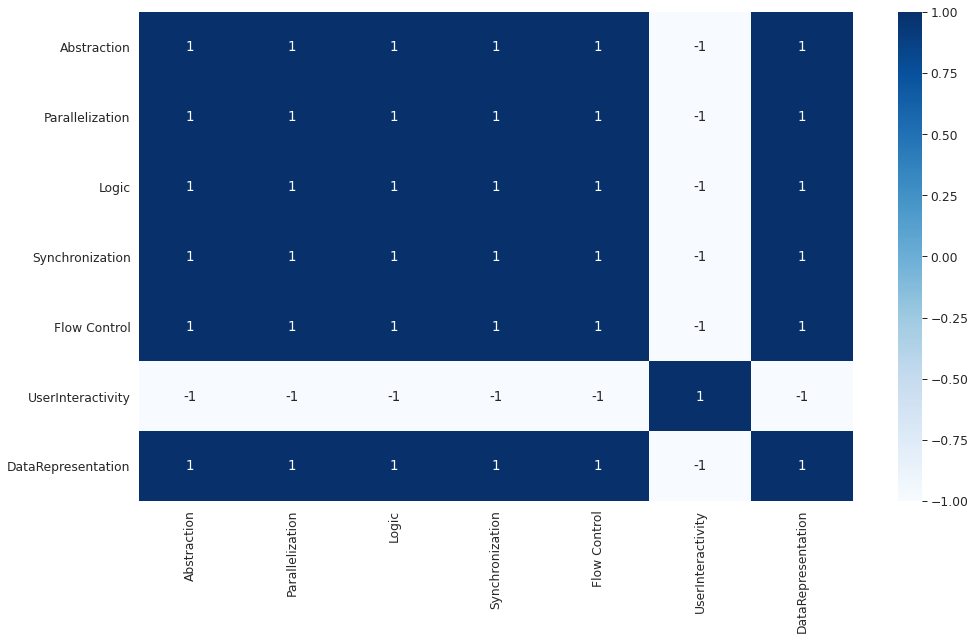

--> Score: 21.0


,Abstraction,Parallelization,Logic,Synchronization,Flow Control,UserInteractivity,DataRepresentation
1,3.0,3.0,3.0,3.0,3.0,3.0,3.0
115,3.0,3.0,3.0,3.0,3.0,3.0,3.0
116,3.0,3.0,3.0,3.0,3.0,3.0,3.0
117,3.0,3.0,3.0,3.0,3.0,3.0,3.0
118,3.0,3.0,3.0,3.0,3.0,3.0,3.0
...,...,...,...,...,...,...,...
269733,3.0,3.0,3.0,3.0,3.0,3.0,3.0
269740,3.0,3.0,3.0,3.0,3.0,3.0,3.0
269770,3.0,3.0,3.0,3.0,3.0,3.0,3.0
269771,3.0,3.0,3.0,3.0,3.0,3.0,3.0


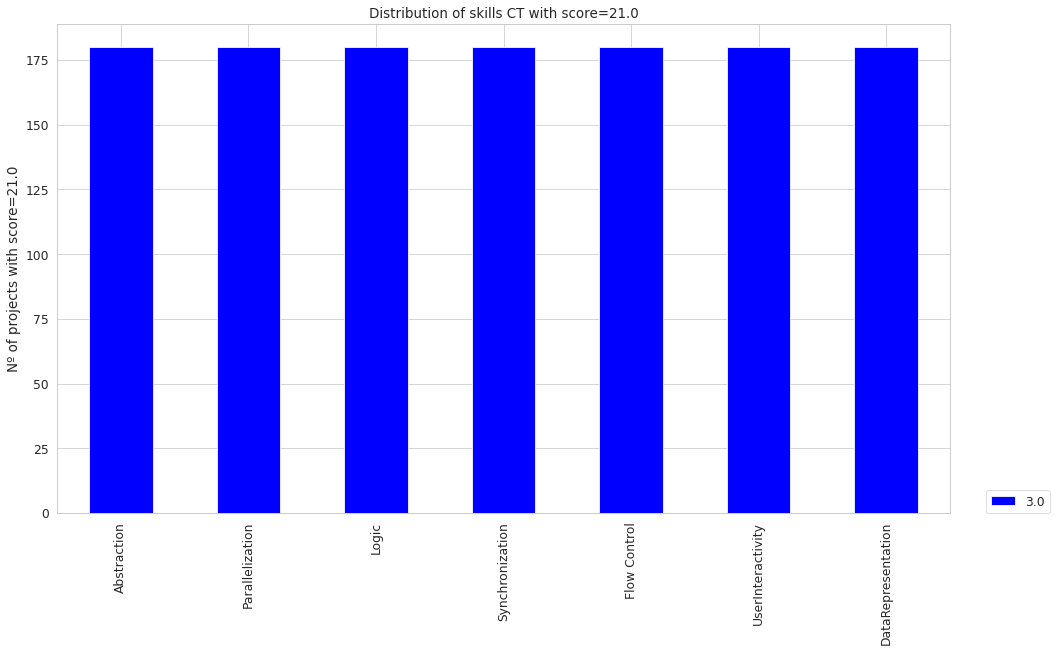

Matriz de covarianza entre las 7 dimensiones para la puntuación 21.0


/home/rcruiz/anaconda3/envs/env_practicas/lib/python3.9/site-packages/pandas/core/frame.py:8525: RuntimeWarning: Degrees of freedom <= 0 for slice
  base_cov = np.cov(mat.T, ddof=ddof)
/home/rcruiz/anaconda3/envs/env_practicas/lib/python3.9/site-packages/numpy/lib/function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/home/rcruiz/anaconda3/envs/env_practicas/lib/python3.9/site-packages/numpy/lib/function_base.py:2542: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


,Abstraction,Parallelization,Logic,Synchronization,Flow Control,UserInteractivity,DataRepresentation
Abstraction,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Parallelization,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Logic,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Synchronization,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Flow Control,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UserInteractivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DataRepresentation,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Matriz de correlación entre las 7 dimensiones para la puntuación 21.0


,Abstraction,Parallelization,Logic,Synchronization,Flow Control,UserInteractivity,DataRepresentation
Abstraction,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Parallelization,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Logic,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Synchronization,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Flow Control,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UserInteractivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DataRepresentation,NaN,NaN,NaN,NaN,NaN,NaN,NaN


/home/rcruiz/anaconda3/envs/env_practicas/lib/python3.9/site-packages/seaborn/matrix.py:194: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/home/rcruiz/anaconda3/envs/env_practicas/lib/python3.9/site-packages/seaborn/matrix.py:199: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


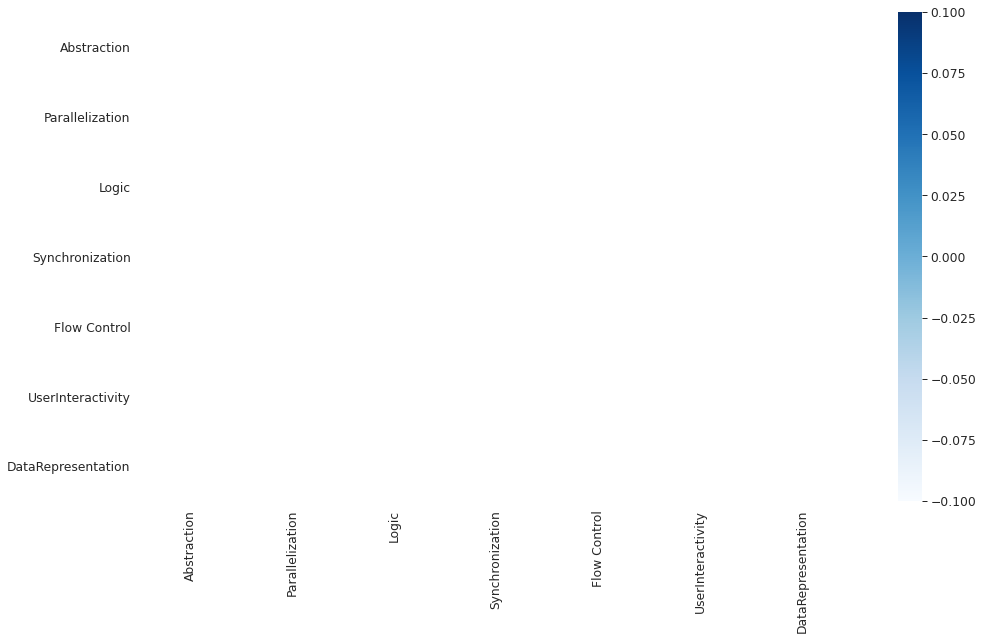

In [60]:
# Distribución de puntos por proyectos
def df_distrib_score(x, ct):
   return df_total_group.get_group(x).filter(ct)


for score in total_score:
    print("--> Score:", score)
    df = df_distrib_score(score, ct).iloc[:, :].apply(pd.value_counts).fillna(0)
    df.T.plot.bar(color={0: "grey", 1: "red", 2:"orange", 3:"blue"})
    plt.legend(loc=(1.04,0))
    title = "Distribution of skills CT with score=" + str(score)
    ylabel= "Nº of projects with score=" + str(score)
    plt.title(title)
    plt.ylabel(ylabel)
    display(df_distrib_score(score,ct))
    plt.show()
    if score !=0:
        print("Matriz de covarianza entre las 7 dimensiones para la puntuación", score)
        display(df.cov())
        print("Matriz de correlación entre las 7 dimensiones para la puntuación", score)
        display(df.corr())
        sns.heatmap(df.corr(), annot= True, cmap='Blues')
        plt.show()

### Aprendizaje no supervisado: clustering k-means

In [44]:
df_dr_scratch.groupby('Total').size()

Total
0.0     16289
1.0       772
2.0      5233
3.0     11361
4.0     15964
5.0     23631
6.0     24472
7.0     33285
8.0     20033
9.0     17717
10.0    16994
11.0    16054
12.0    12449
13.0    11016
14.0     9879
15.0     8190
16.0     6682
17.0     5163
18.0     4319
19.0     5570
20.0     4589
21.0      180
dtype: int64

In [45]:
X = np.array(df_ct[["Logic", "Abstraction", "Parallelization"]])
y = np.array(df_dr_scratch['Total'])
X.shape


(269842, 3)

Hallar el punto de """codo""" de lacurva de Elbow

[-830406.1364432301, -413193.1287922302, -271559.5062964885, -206892.8474591492, -161124.35643539144, -144071.48746447236, -119888.09004558349, -105273.87459465764, -97798.61408881319, -85984.8712529906, -76264.63684675551, -67637.05918073891, -59734.951370764094, -55539.613197373095, -49973.88476718686, -43843.661788316116, -40987.937290141155, -36282.74503110084, -30872.600248287796, -28375.794225743393]


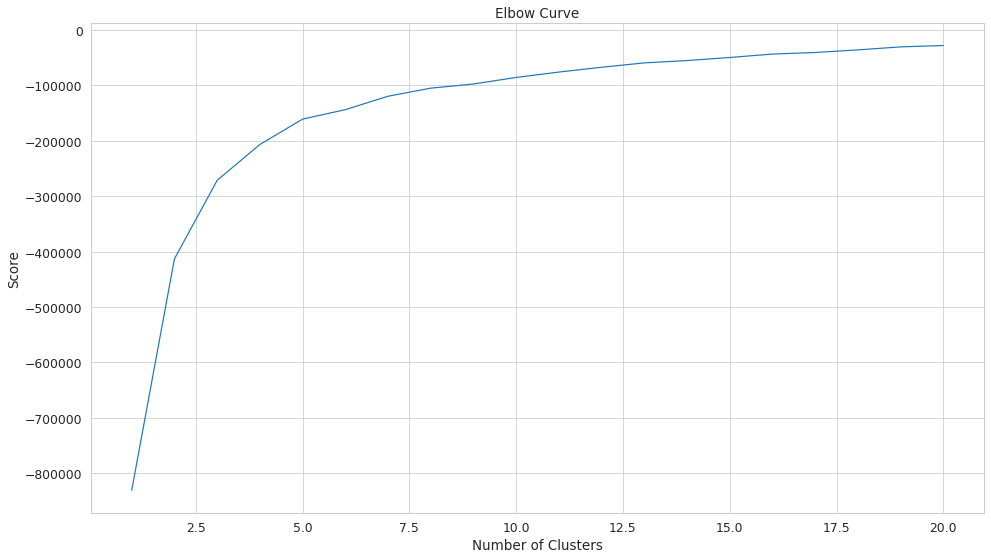

In [46]:
Nc= range(1, 21)
kmeans = [KMeans(n_clusters=i) for i in Nc]
#print(kmeans)
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
print(score)
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [47]:
kmeans = KMeans(n_clusters=7).fit(X) 
centroids = kmeans.cluster_centers_
print(centroids)

[[1.28557254e+00 4.27096018e-02 9.98556803e-01]
 [2.62822716e+00 2.73024055e+00 2.46689136e+00]
 [3.06421555e-14 2.14366388e-01 2.05685566e+00]
 [2.43390437e+00 4.32606258e-01 2.04519796e+00]
 [3.74131306e-01 2.51410351e+00 2.09042597e+00]
 [1.00000000e+00 1.41079460e-01 2.04495609e+00]
 [4.08562073e-14 3.48887829e-02 6.44893136e-01]]


In [48]:
labels = kmeans.predict(X)
print(labels)
len(labels)

[5 1 0 ... 3 1 1]


269842

In [49]:
df_ct["labels"]=labels
df_ct

,Abstraction,Parallelization,Logic,Synchronization,Flow Control,UserInteractivity,DataRepresentation,labels
0,0.0,2.0,1.0,1.0,1.0,1.0,1.0,5
1,3.0,3.0,3.0,3.0,3.0,3.0,3.0,1
2,0.0,1.0,2.0,1.0,1.0,1.0,3.0,0
3,0.0,2.0,0.0,0.0,1.0,0.0,0.0,2
4,0.0,1.0,0.0,1.0,1.0,2.0,1.0,6
...,...,...,...,...,...,...,...,...
269839,1.0,2.0,2.0,1.0,2.0,2.0,3.0,3
269840,1.0,2.0,2.0,1.0,2.0,2.0,3.0,3
269841,1.0,2.0,2.0,1.0,2.0,2.0,3.0,3
269842,3.0,2.0,2.0,1.0,3.0,2.0,3.0,1


In [50]:
df_ct["Total"]= df_dr_scratch["Total"]
df_ct

,Abstraction,Parallelization,Logic,Synchronization,Flow Control,UserInteractivity,DataRepresentation,labels,Total
0,0.0,2.0,1.0,1.0,1.0,1.0,1.0,5,7.0
1,3.0,3.0,3.0,3.0,3.0,3.0,3.0,1,21.0
2,0.0,1.0,2.0,1.0,1.0,1.0,3.0,0,9.0
3,0.0,2.0,0.0,0.0,1.0,0.0,0.0,2,3.0
4,0.0,1.0,0.0,1.0,1.0,2.0,1.0,6,6.0
...,...,...,...,...,...,...,...,...,...
269839,1.0,2.0,2.0,1.0,2.0,2.0,3.0,3,13.0
269840,1.0,2.0,2.0,1.0,2.0,2.0,3.0,3,13.0
269841,1.0,2.0,2.0,1.0,2.0,2.0,3.0,3,13.0
269842,3.0,2.0,2.0,1.0,3.0,2.0,3.0,1,16.0


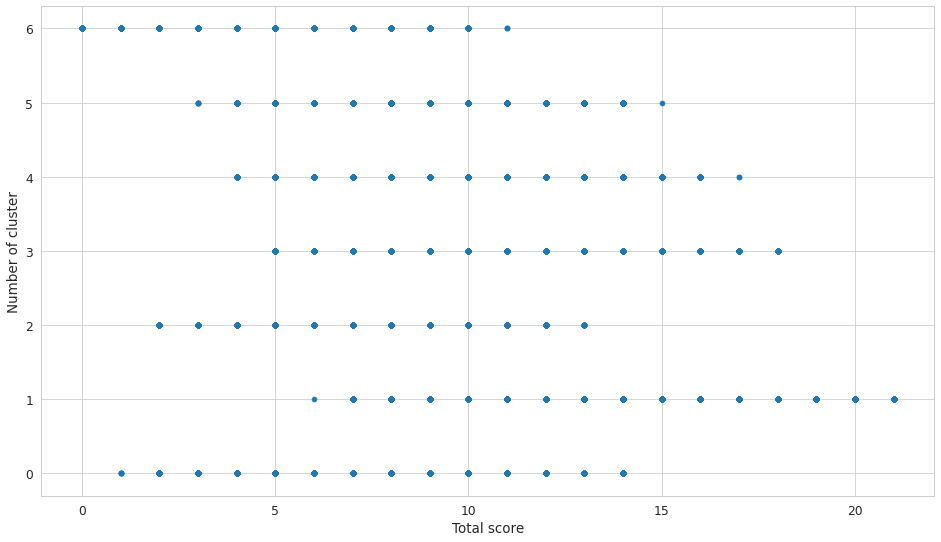

In [51]:
plt.scatter(df_ct["Total"], df_ct["labels"])
plt.ylabel("Number of cluster")
plt.xlabel("Total score")
plt.show()

In [52]:
kmeans2 = KMeans(n_clusters=7,init='k-means++', n_init=10, max_iter=300, tol=0.0001, random_state=42, algorithm='auto')

In [53]:
kmeans2.fit(X)

KMeans(n_clusters=7, random_state=42)

In [54]:
kmeans2.cluster_centers_

array([[ 2.47359306e-01,  3.25464559e-02,  7.32638510e-01],
       [ 3.74131306e-01,  2.51410351e+00,  2.09042597e+00],
       [ 2.70544873e+00,  2.94716992e+00,  2.60018858e+00],
       [ 2.36747025e+00,  1.31567282e+00,  2.10644887e+00],
       [ 1.00000000e+00,  1.41079460e-01,  2.04495609e+00],
       [ 2.39857898e+00, -1.58761893e-14,  1.78730901e+00],
       [ 3.08642001e-14,  2.14366388e-01,  2.05685566e+00]])

In [57]:
kmeans2.inertia_

119262.98046903759

In [58]:
kmeans2.labels_

array([4, 2, 5, ..., 3, 2, 2], dtype=int32)

In [59]:
kmeans2.predict(X)

array([4, 2, 5, ..., 3, 2, 2], dtype=int32)